In [11]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
linestyle = ['--', '--', '--', '--', '--']
fig_width, fig_height = 8, 6

fig_names = [
    "Fig. 1: Impact of Evaporation on TDS and EY",
    "Fig. 2: TDS Measurements Across Refractometers I",
    "Fig. 3: TDS Measurement Distribution Across Refractometers I",
    "Fig. 4: TDS Measurements Across Refractometers II",
    "Fig. 5: TDS Measurement Distribution Across Refractometers II",
    "Fig. 6: Refractive Index Measurement of Sucrose Solution I (Difluid)",
    "Fig. 7: Refractive Index Measurement of Sucrose Solution II (Difluid)",
    "Fig. 8: Distribution of Refractive Index Measurements I (Difluid)",
    "Fig. 9: Distribution of Refractive Index Measurements II (Difluid)",
    "Fig. 10: Display of Difluids' Measurement Tendencies Across Experiments"
]

file_path = "experimental_data.xlsx"

In [17]:
import matplotlib.font_manager as font_manager

# List all fonts available in the Matplotlib font manager
font_list = font_manager.findSystemFonts()
names = []

for font in font_list:
    try:
        prop = font_manager.FontProperties(fname=font)
        name = prop.get_name()
        if name not in names:  # This helps in avoiding duplicates
            names.append(name)
    except Exception as e:
        print(f"Failed to load font: {font}, due to error: {e}")

# Print the sorted list of font names
names.sort()
print("Available fonts for matplotlib:")
for name in names:
    print(name)


Failed to load font: /System/Library/Fonts/Apple Color Emoji.ttc, due to error: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
Failed to load font: /Users/timothyweng/Library/Fonts/SourceHanSerifTC-VF.otf, due to error: In FT2Font: Can not load face (SFNT font table missing; error code 0x8e)
Failed to load font: /System/Library/Fonts/Supplemental/NISC18030.ttf, due to error: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
Failed to load font: /Users/timothyweng/Library/Fonts/SourceHanSansTC-VF.otf, due to error: In FT2Font: Can not load face (SFNT font table missing; error code 0x8e)
Available fonts for matplotlib:
.Aqua Kana
.Keyboard
.LastResort
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh


In [28]:
import matplotlib.pyplot as plt

print(plt.rcParams["font.sans-serif"][0])
print(plt.rcParams["font.monospace"][0])

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["DM Sans"]

DM Sans 18pt
DejaVu Sans Mono


In [19]:
from typing import List, Tuple, Optional
import pandas as pd
import numpy as np

def calculate_color_with_alpha(color: str, alpha: float) -> str:
    """Modify a hex color string based on an alpha blending towards white."""
    r, g, b = (int(color[i:i+2], 16) for i in (1, 3, 5))
    new_color = (int(alpha * c + (1 - alpha) * 255) for c in (r, g, b))
    return '#{:02x}{:02x}{:02x}'.format(*new_color)

def read_excel_data(file_path: str, sheet_name: Optional[str] = None) -> List[List[str]]:
    """Read an Excel file into a list of lists, transposed, optionally specifying a sheet name."""
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    transposed_data = df.transpose().values.tolist()
    return transposed_data

def preprocess_data(data: List[List[str]], label_row_index: int = 0, multiply: float = 1) -> Tuple[List[List[float]], List[str]]:
    """Convert transposed data rows into separate lists of measurements and labels.
    Assumes the first row (after transposition) is an identifier and thus skips it for measurements."""
    labels = [row[label_row_index] for row in data]  # Extracting labels
    measurements = [[float(value) * multiply for value in row[label_row_index+1:]] for row in data]  # Extracting data
    return measurements[1:], labels[1:]  # Skipping the first set assuming it's an identifier

def calculate_stats(measurements: List[List[float]]) -> Tuple[List[float], List[float]]:
    """Calculate mean and standard deviation of lists of measurements."""
    means = [np.mean(measurement_list) for measurement_list in measurements]
    std_devs = [np.std(measurement_list) for measurement_list in measurements]
    return means, std_devs

# Example usage:
# data = read_excel_data('path_to_your_file.xlsx')
# measurements, labels = preprocess_data(data, label_row_index=0)  # Specify the label_row_index if needed
# means, std_devs = calculate_stats(measurements)

In [20]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def finalize_plot(fig_num):
  plt.title(fig_names[fig_num - 1], pad=13, fontsize='x-large')
  plt.tight_layout(pad=2)
  # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  plt.savefig(f"fig{fig_num}.png")

def draw_exp1(sheet_name, fig_num):
  evaporation_data = read_excel_data(file_path, sheet_name)
  measurements, labels = preprocess_data(evaporation_data, label_row_index=1, multiply=100)

  tds_means, tds_stds = calculate_stats(measurements)

  ey_measurements = [[323.8*measurement/18 for measurement in measurement_list] for measurement_list in measurements]
  ey_means, ey_stds = calculate_stats(ey_measurements)

  # Print Bar Chart
  x = np.array([0, 1, 2, 3.5, 4.5, 5.5])
  width = 0.35
  space = 0.1

  fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

  ax1.bar(x - width/2 - space/2, tds_means, width, yerr=[1.96*std for std in tds_stds], label='TDS', alpha=1, ecolor=colors[0], capsize=5, color=calculate_color_with_alpha(colors[0], 0.3), zorder=3)
  ax1.set_ylabel('Total Dissolved Solids (TDS) (%)', verticalalignment='center_baseline', labelpad=13)
  # ax1.yaxis.set_label_coords(-0.087, 0.5)
  ax1.set_ylim(1.25, 1.55)
  ax1.set_yticks([1.3, 1.4, 1.5])
  ax1.yaxis.grid(zorder=0)

  ax2 = ax1.twinx()
  ax2.bar(x + width/2 + space/2, ey_means, width, yerr=[1.96*std for std in ey_stds], label='EY', alpha=1, ecolor=colors[1], capsize=5, color=calculate_color_with_alpha(colors[1], 0.3))
  ax2.set_ylabel('Extraction Yield (EY) (%)', verticalalignment='center_baseline', labelpad=13)
  # ax2.yaxis.set_label_coords(1.087, 0.5)
  ax2.set_ylim(23.5, 26.5)
  ax2.set_yticks([24, 25, 26])

  ax1.set_xlim([-0.75, len(labels) + 0.25])
  ax1.set_xticks(x)
  ax1.set_xticklabels(labels)
  ax1.tick_params(bottom=False)

  # Add vertical dotted line
  line_position = 2.75  # Position between 'No Lid (Atago)' and 'Control (R2 #1)'
  ax1.axvline(x=line_position, color='black', linestyle='--', linewidth=1)

  alpha_color = [calculate_color_with_alpha(colors[0], 0.5), calculate_color_with_alpha(colors[1], 0.5)]
  dots = [mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                        markersize=5, label=label) for color, label in zip(alpha_color, ['TDS', 'EY'])]
  ax1.legend(handles=dots, loc='upper right',
              frameon=False, ncol=len(dots), handletextpad=0.5, handlelength=0.5, columnspacing=1)

  finalize_plot(fig_num)
  
def draw_exp2_line(sheet_name, fig_num):
  comparison_data = read_excel_data(file_path, sheet_name)
  print(comparison_data)
  del comparison_data[-1]
  measurements, labels = preprocess_data(comparison_data, multiply=100)

  # Create the line graph
  fig1, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)

  x = np.arange(1, len(measurements[0]) + 1)
  for i in range(len(measurements)):
      y = np.array(measurements[i])
      ax.plot(x, y, marker='.', linestyle=linestyle[i], alpha=1, label=labels[i], color=colors[i])

  ax.set_xlabel('Sample Index', verticalalignment='center_baseline', labelpad=13)
  ax.set_ylabel('Total Dissolved Solids (TDS) (%)', verticalalignment='center_baseline', labelpad=13)
  ax.set_ylim(1.2, 1.5)
  ax.set_yticks([1.3, 1.4])
  ax.yaxis.grid(zorder=0)
  ax.set_xlim(0, len(measurements[0]) + 1)
  ax.set_xticks(x)
  ax.tick_params(bottom=False)
  
  dots = [mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                        markersize=5, label=label) for color, label in zip(colors, labels)]
  order = [0, 1, 3, 2, 4]
  dots = [dots[i] for i in order]
  dots.insert(1, mlines.Line2D([], [], color='none', marker='none', linestyle='none'))
  ax.legend(handles=dots, loc='upper right',
              frameon=False, ncol=3, handletextpad=0.5, handlelength=0.5, columnspacing=1)

  finalize_plot(fig_num)

def draw_exp2_violin(sheet_name, fig_num, double_spoon):
  comparison_data = read_excel_data(file_path, sheet_name)
  del comparison_data[-1]
  print(comparison_data)
  measurements, labels = preprocess_data(comparison_data, multiply=100)
  
  fig2, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)

  # Create a violin plot using Matplotlib
  violin_parts = ax.violinplot(measurements, positions=range(len(measurements)), widths=0.8, showmeans=True, showextrema=True, showmedians=False)

  # Customize the violin plot colors
  for i, pc in enumerate(violin_parts['bodies']):
      pc.set_facecolor(colors[i])
      pc.set_edgecolor('none')

  violin_parts['cmeans'].set_color(colors)
  violin_parts['cmins'].set_color(colors)
  violin_parts['cmaxes'].set_color(colors)
  violin_parts['cbars'].set_color(colors)

  violin_parts['cmeans'].set_linewidth(1)
  violin_parts['cmins'].set_linewidth(1)
  violin_parts['cmaxes'].set_linewidth(1)
  violin_parts['cbars'].set_linewidth(1)

  # Add the data point of double spoon method
  plt.plot(4, double_spoon[0], marker='.', color=colors[4])
  ax.text(4+0.04, double_spoon[0]+double_spoon[1], "Double Spoon", verticalalignment=double_spoon[2], color=colors[4], fontsize=10)

  # Set x-axis labels and remove bottom tick marks
  ax.set_xticks(range(len(labels)))
  ax.set_xticklabels(labels)
  ax.tick_params(bottom=False)

  # Set y-axis limits and tick marks
  ax.set_ylim(1.2, 1.5)
  ax.set_yticks([1.3, 1.4])
  ax.set_xlim(-1, len(labels))
  ax.yaxis.grid(zorder=0)

  # Set axis labels
  ax.set_ylabel('Total Dissolved Solids (TDS) (%)', verticalalignment='center_baseline', labelpad=13)

  # Adjust the layout and display the plot
  finalize_plot(fig_num)
  
def draw_exp3_line(sheet_name, fig_num, ground_truth):
  sucrose_data = read_excel_data(file_path, sheet_name)
  print(sucrose_data)
  measurements, labels = preprocess_data(sucrose_data)

  ri_means, ri_stds = calculate_stats(measurements)
  for label, mean, std in zip(labels, ri_means, ri_stds):
    print(f"{label} (TDS): {mean:.5f}±{std:.5f}, {100*(mean-(ground_truth[1]+ground_truth[0])/2)/(ground_truth[1]-1.3330):.2f}%")

  # Create the line graph
  fig1, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)

  plt.axhspan(ground_truth[0], ground_truth[1], facecolor=calculate_color_with_alpha(colors[3], 0.3), edgecolor=colors[3], linestyle='--')
  ax.text(0.135, ground_truth[1] + 0.000011, f"Ground Truth = [{ground_truth[0]:.5f}, {ground_truth[1]:.5f}]", color=colors[3], fontsize=10)

  x = np.arange(1, len(measurements[0]) + 1)
  for i in range(len(measurements)):
      y = np.array(measurements[i])
      ax.plot(x, y, marker='.', linestyle=linestyle[i], alpha=1, label=labels[i], color=colors[i])

  ax.set_xlabel('Sample Index', verticalalignment='center_baseline', labelpad=13)
  ax.set_ylabel('Refractive Index', verticalalignment='center_baseline', labelpad=13)
  ax.set_ylim(1.3472, 1.3480)
  ax.set_yticks([1.3474, 1.3476, 1.3478])
  ax.ticklabel_format(axis='y', useOffset=False)
  ax.yaxis.grid(zorder=0)
  ax.set_xlim(0, len(measurements[0]) + 1)
  ax.set_xticks(x)
  ax.tick_params(bottom=False)

  dots = [mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                        markersize=5, label=label) for color, label in zip(colors, labels)]
  ax.legend(handles=dots, loc='upper right',
              frameon=False, ncol=3, handletextpad=0.5, handlelength=0.5, columnspacing=1)
  
  finalize_plot(fig_num)

def draw_exp3_violin(sheet_name, fig_num, ground_truth):
  sucrose_data = read_excel_data(file_path, sheet_name)
  print(sucrose_data)
  measurements, labels = preprocess_data(sucrose_data)
  
  fig2, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)

  plt.axhspan(ground_truth[0], ground_truth[1], facecolor=calculate_color_with_alpha(colors[3], 0.3), edgecolor=colors[3], linestyle='--')
  ax.text(-1+0.05, ground_truth[1] + 0.000011, f"Ground Truth = [{ground_truth[0]:.5f}, {ground_truth[1]:.5f}]", color=colors[3], fontsize=10)

  # Create a violin plot using Matplotlib
  violin_parts = ax.violinplot(measurements, positions=range(len(measurements)), widths=0.8, showmeans=True, showextrema=True, showmedians=False)

  # Customize the violin plot colors
  for i, pc in enumerate(violin_parts['bodies']):
      pc.set_facecolor(colors[i])
      pc.set_edgecolor('none')

  violin_parts['cmeans'].set_color(colors)
  violin_parts['cmins'].set_color(colors)
  violin_parts['cmaxes'].set_color(colors)
  violin_parts['cbars'].set_color(colors)

  violin_parts['cmeans'].set_linewidth(1)
  violin_parts['cmins'].set_linewidth(1)
  violin_parts['cmaxes'].set_linewidth(1)
  violin_parts['cbars'].set_linewidth(1)
  
  # Set x-axis labels and remove bottom tick marks
  ax.set_xticks(range(len(labels)))
  ax.set_xticklabels(labels)
  ax.tick_params(bottom=False)

  # Set y-axis limits and tick marks
  ax.set_ylim(1.3472, 1.3480)
  ax.set_yticks([1.3474, 1.3476, 1.3478])
  ax.ticklabel_format(axis='y', useOffset=False)
  ax.set_xlim(-1, len(labels))
  ax.yaxis.grid(zorder=0)

  # Set axis labels
  ax.set_ylabel('Refractive Index', verticalalignment='center_baseline', labelpad=13)

  # Adjust the layout and display the plot
  finalize_plot(fig_num)

[['Sample Index', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], ['Difluid #1', 0.0137, 0.0136, 0.0136, 0.0135, 0.0136, 0.0136, 0.0136, 0.0136, 0.0137, 0.0136, 0.0135, 0.0136, 0.0136, 0.0136, 0.0135, 0.0136, 0.0137, 0.0136, 0.0136, 0.0137], ['Difluid #2', 0.0135, 0.0135, 0.0135, 0.0135, 0.0135, 0.0136, 0.0135, 0.0135, 0.013399999999999999, 0.0135, 0.0135, 0.0135, 0.0136, 0.0135, 0.0135, 0.0136, 0.013699999999999999, 0.0136, 0.0136, 0.0136], ['Difluid #3', 0.0134, 0.0133, 0.0132, 0.0133, 0.0133, 0.0133, 0.0133, 0.0134, 0.0134, 0.0133, 0.0133, 0.0134, 0.0132, 0.0133, 0.0133, 0.0133, 0.0134, 0.0133, 0.0133, 0.0134], ['Atago', 0.014100000000000001, 0.0142, 0.014100000000000001, 0.014100000000000001, 0.014100000000000001, 0.014100000000000001, 0.014, 0.0143, 0.013900000000000001, 0.014100000000000001, 0.013900000000000001, 0.014100000000000001, 0.014100000000000001, 0.014100000000000001, 0.014, 0.013900000000000001, 0.014100000000000001, 0.014, 0.014, 0.014], ['VST'

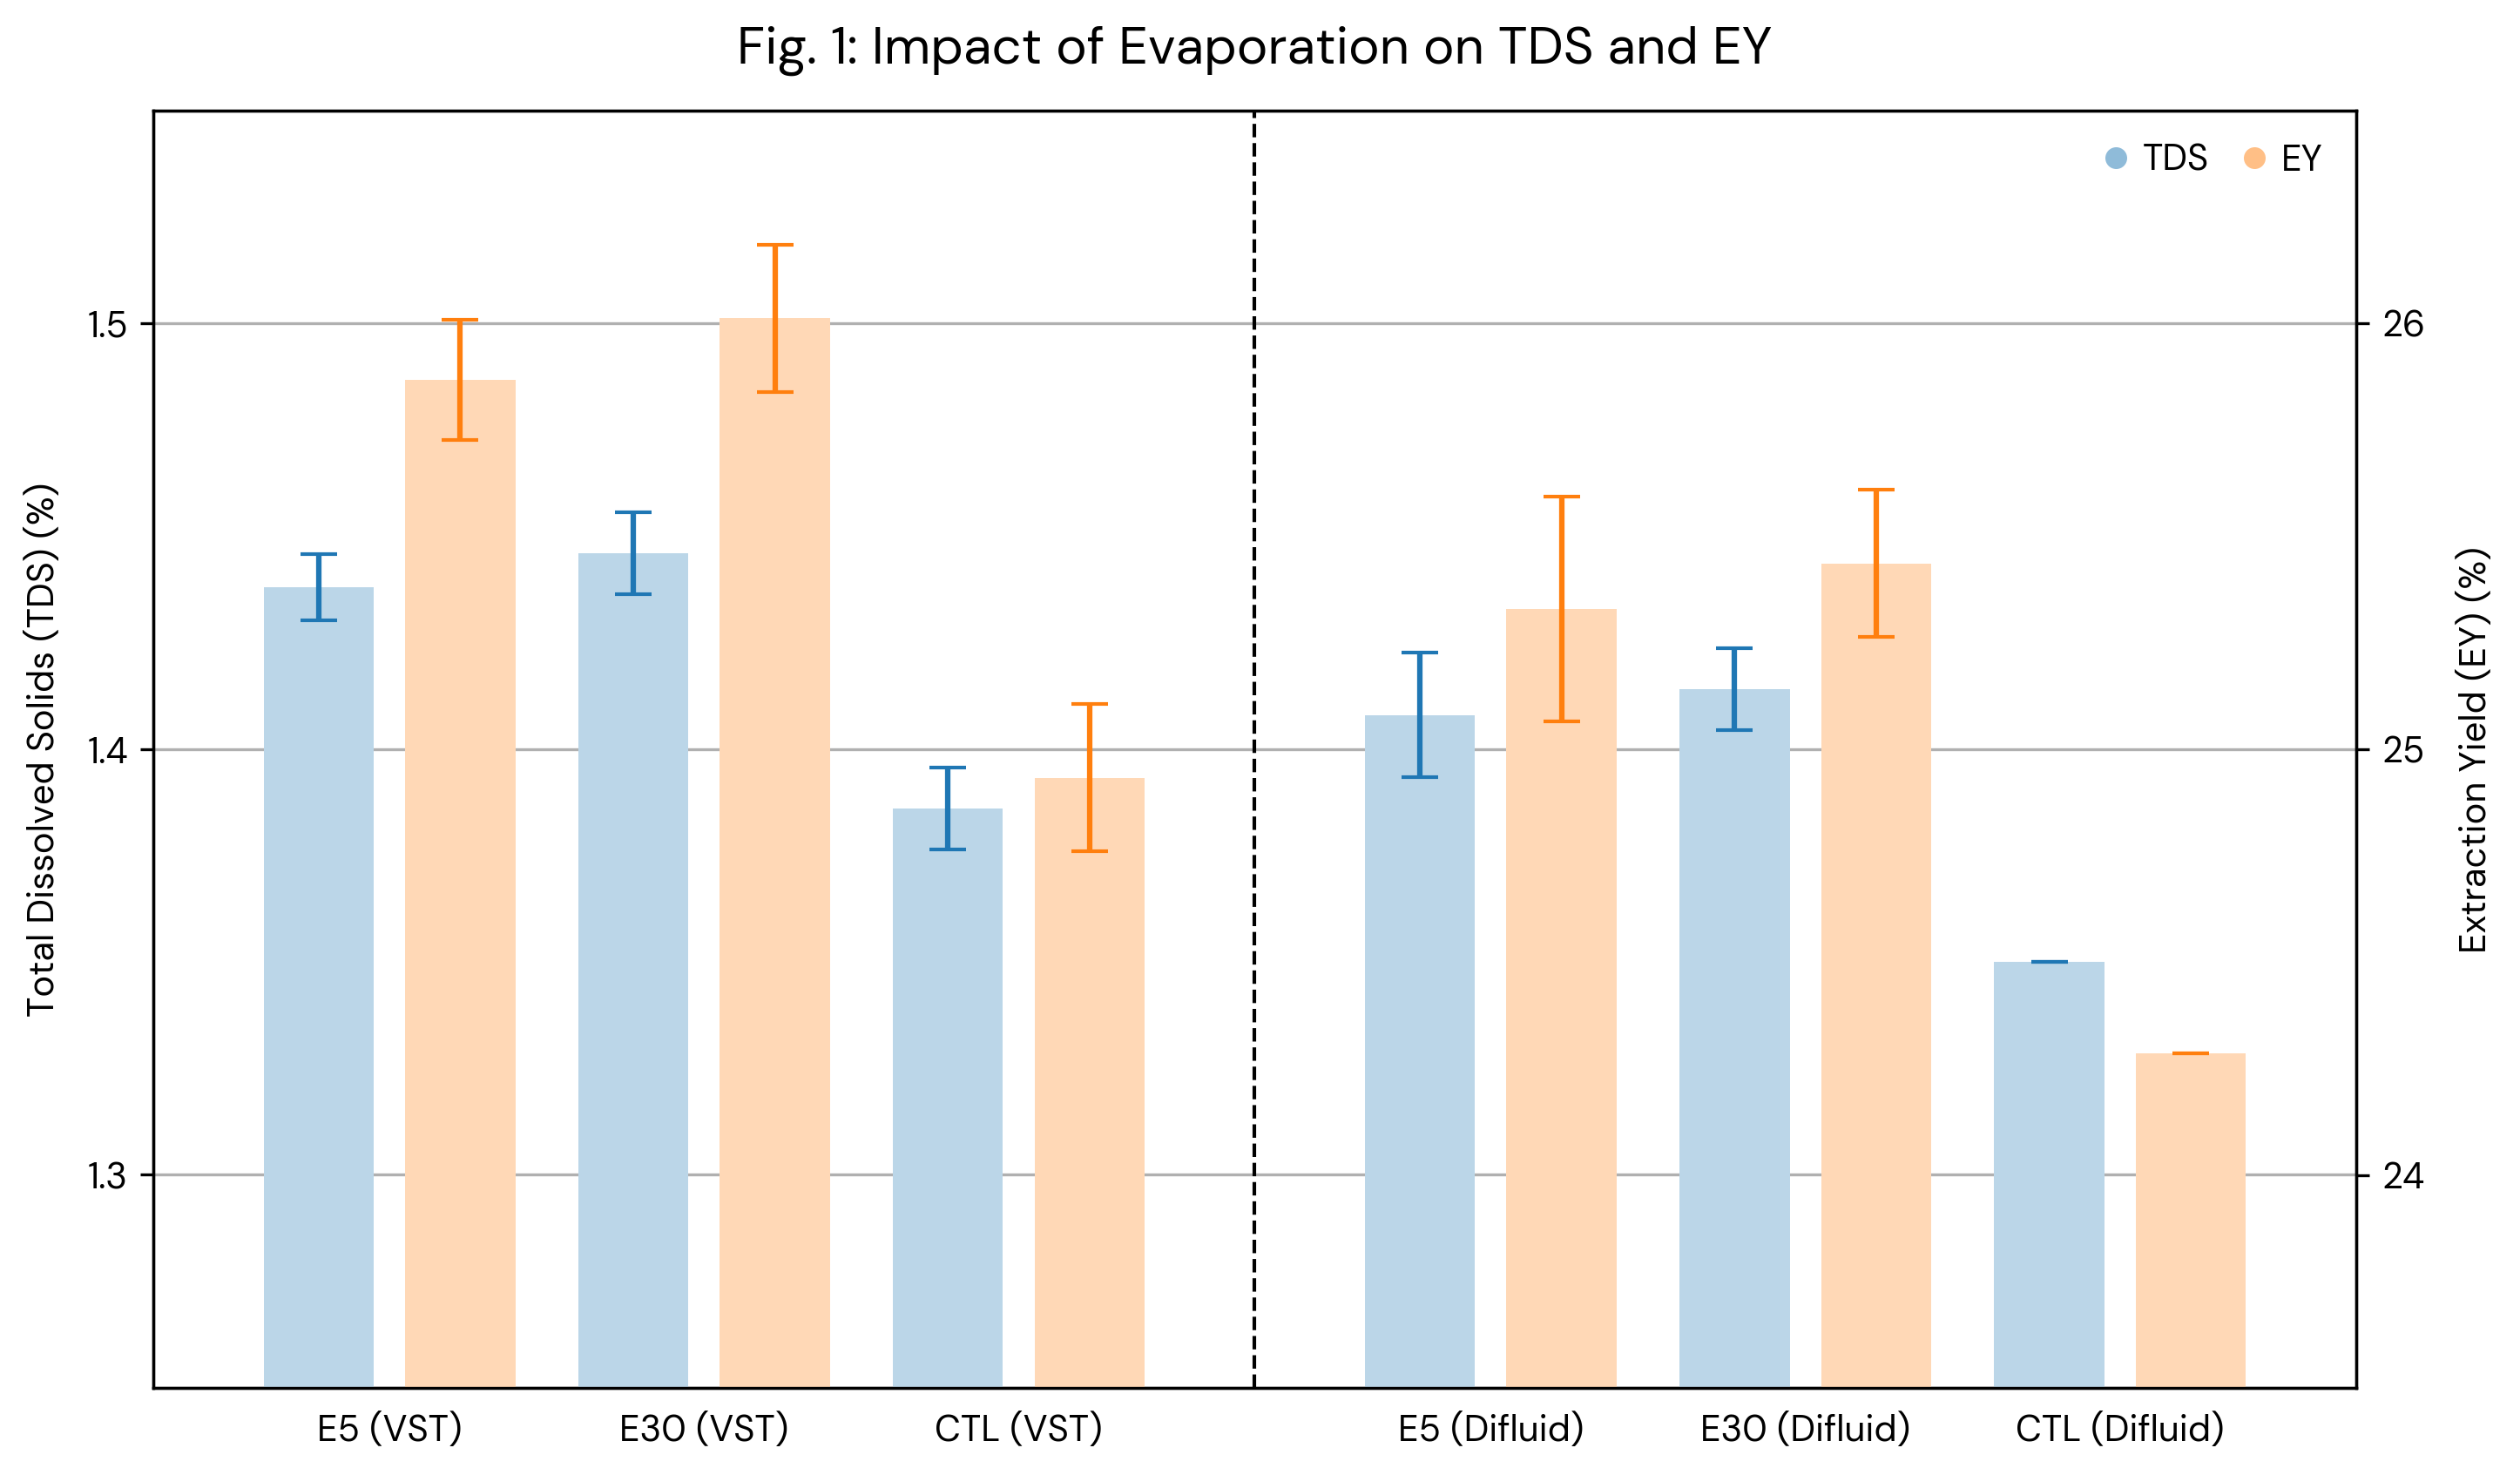

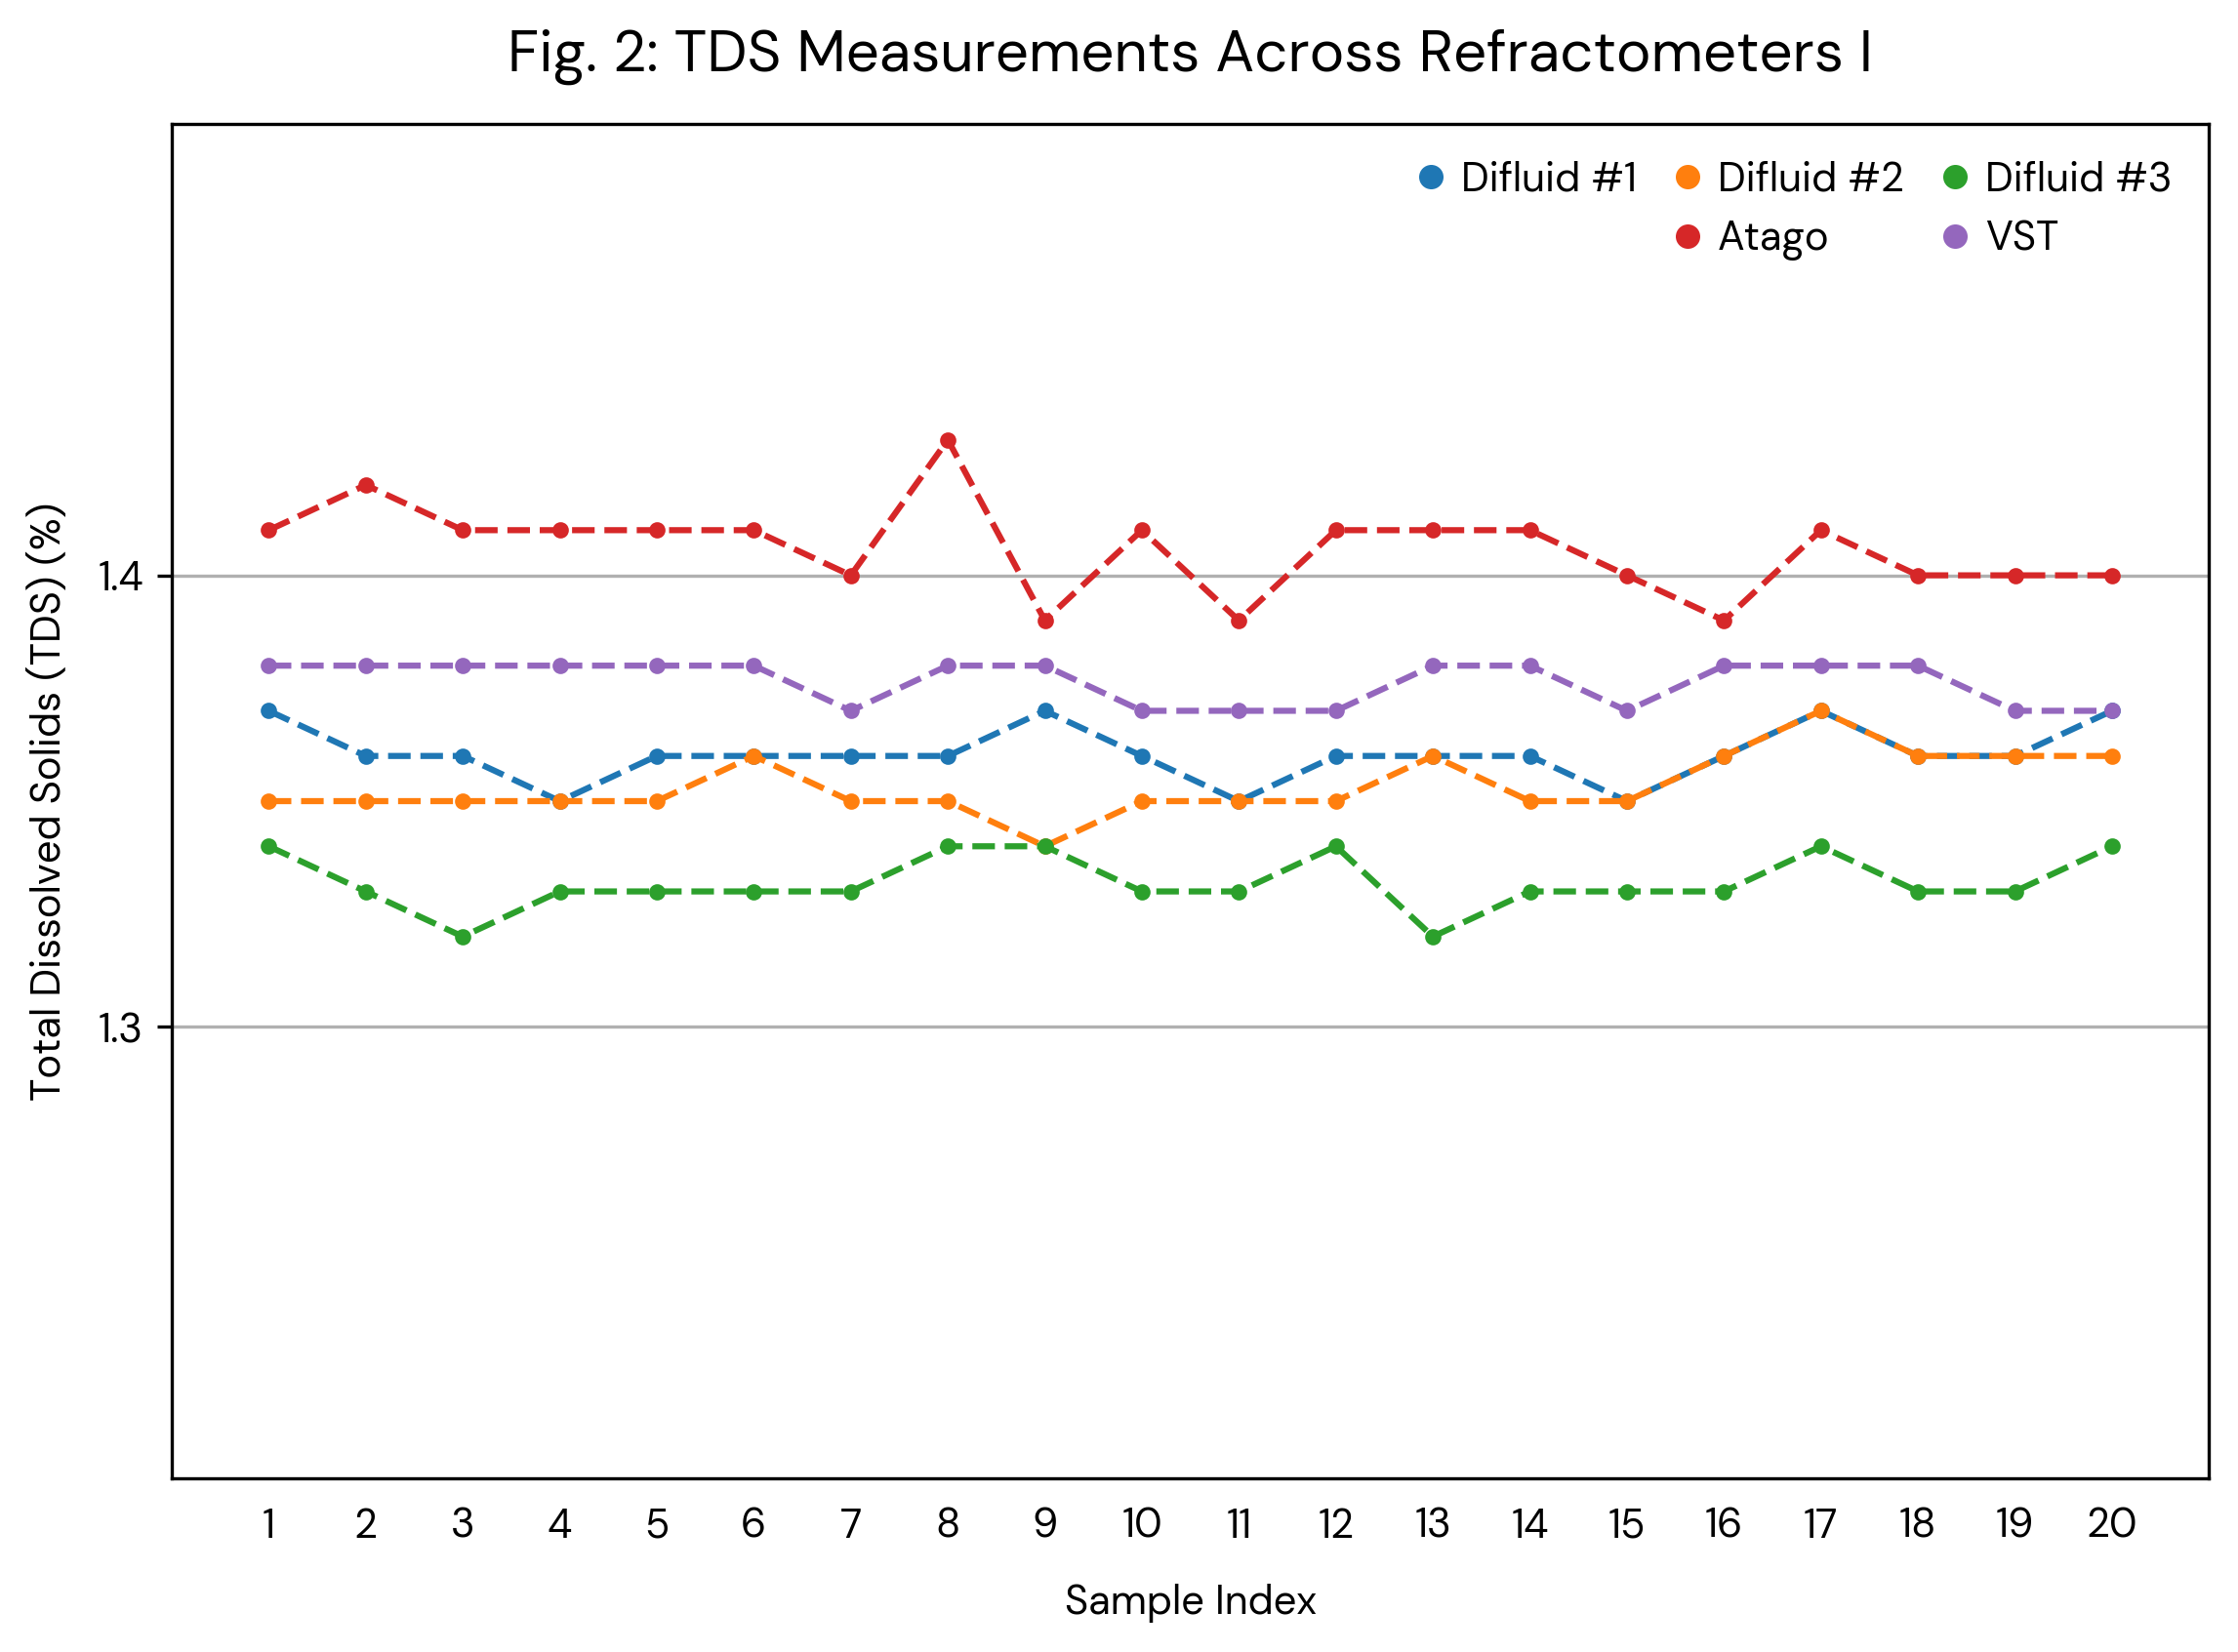

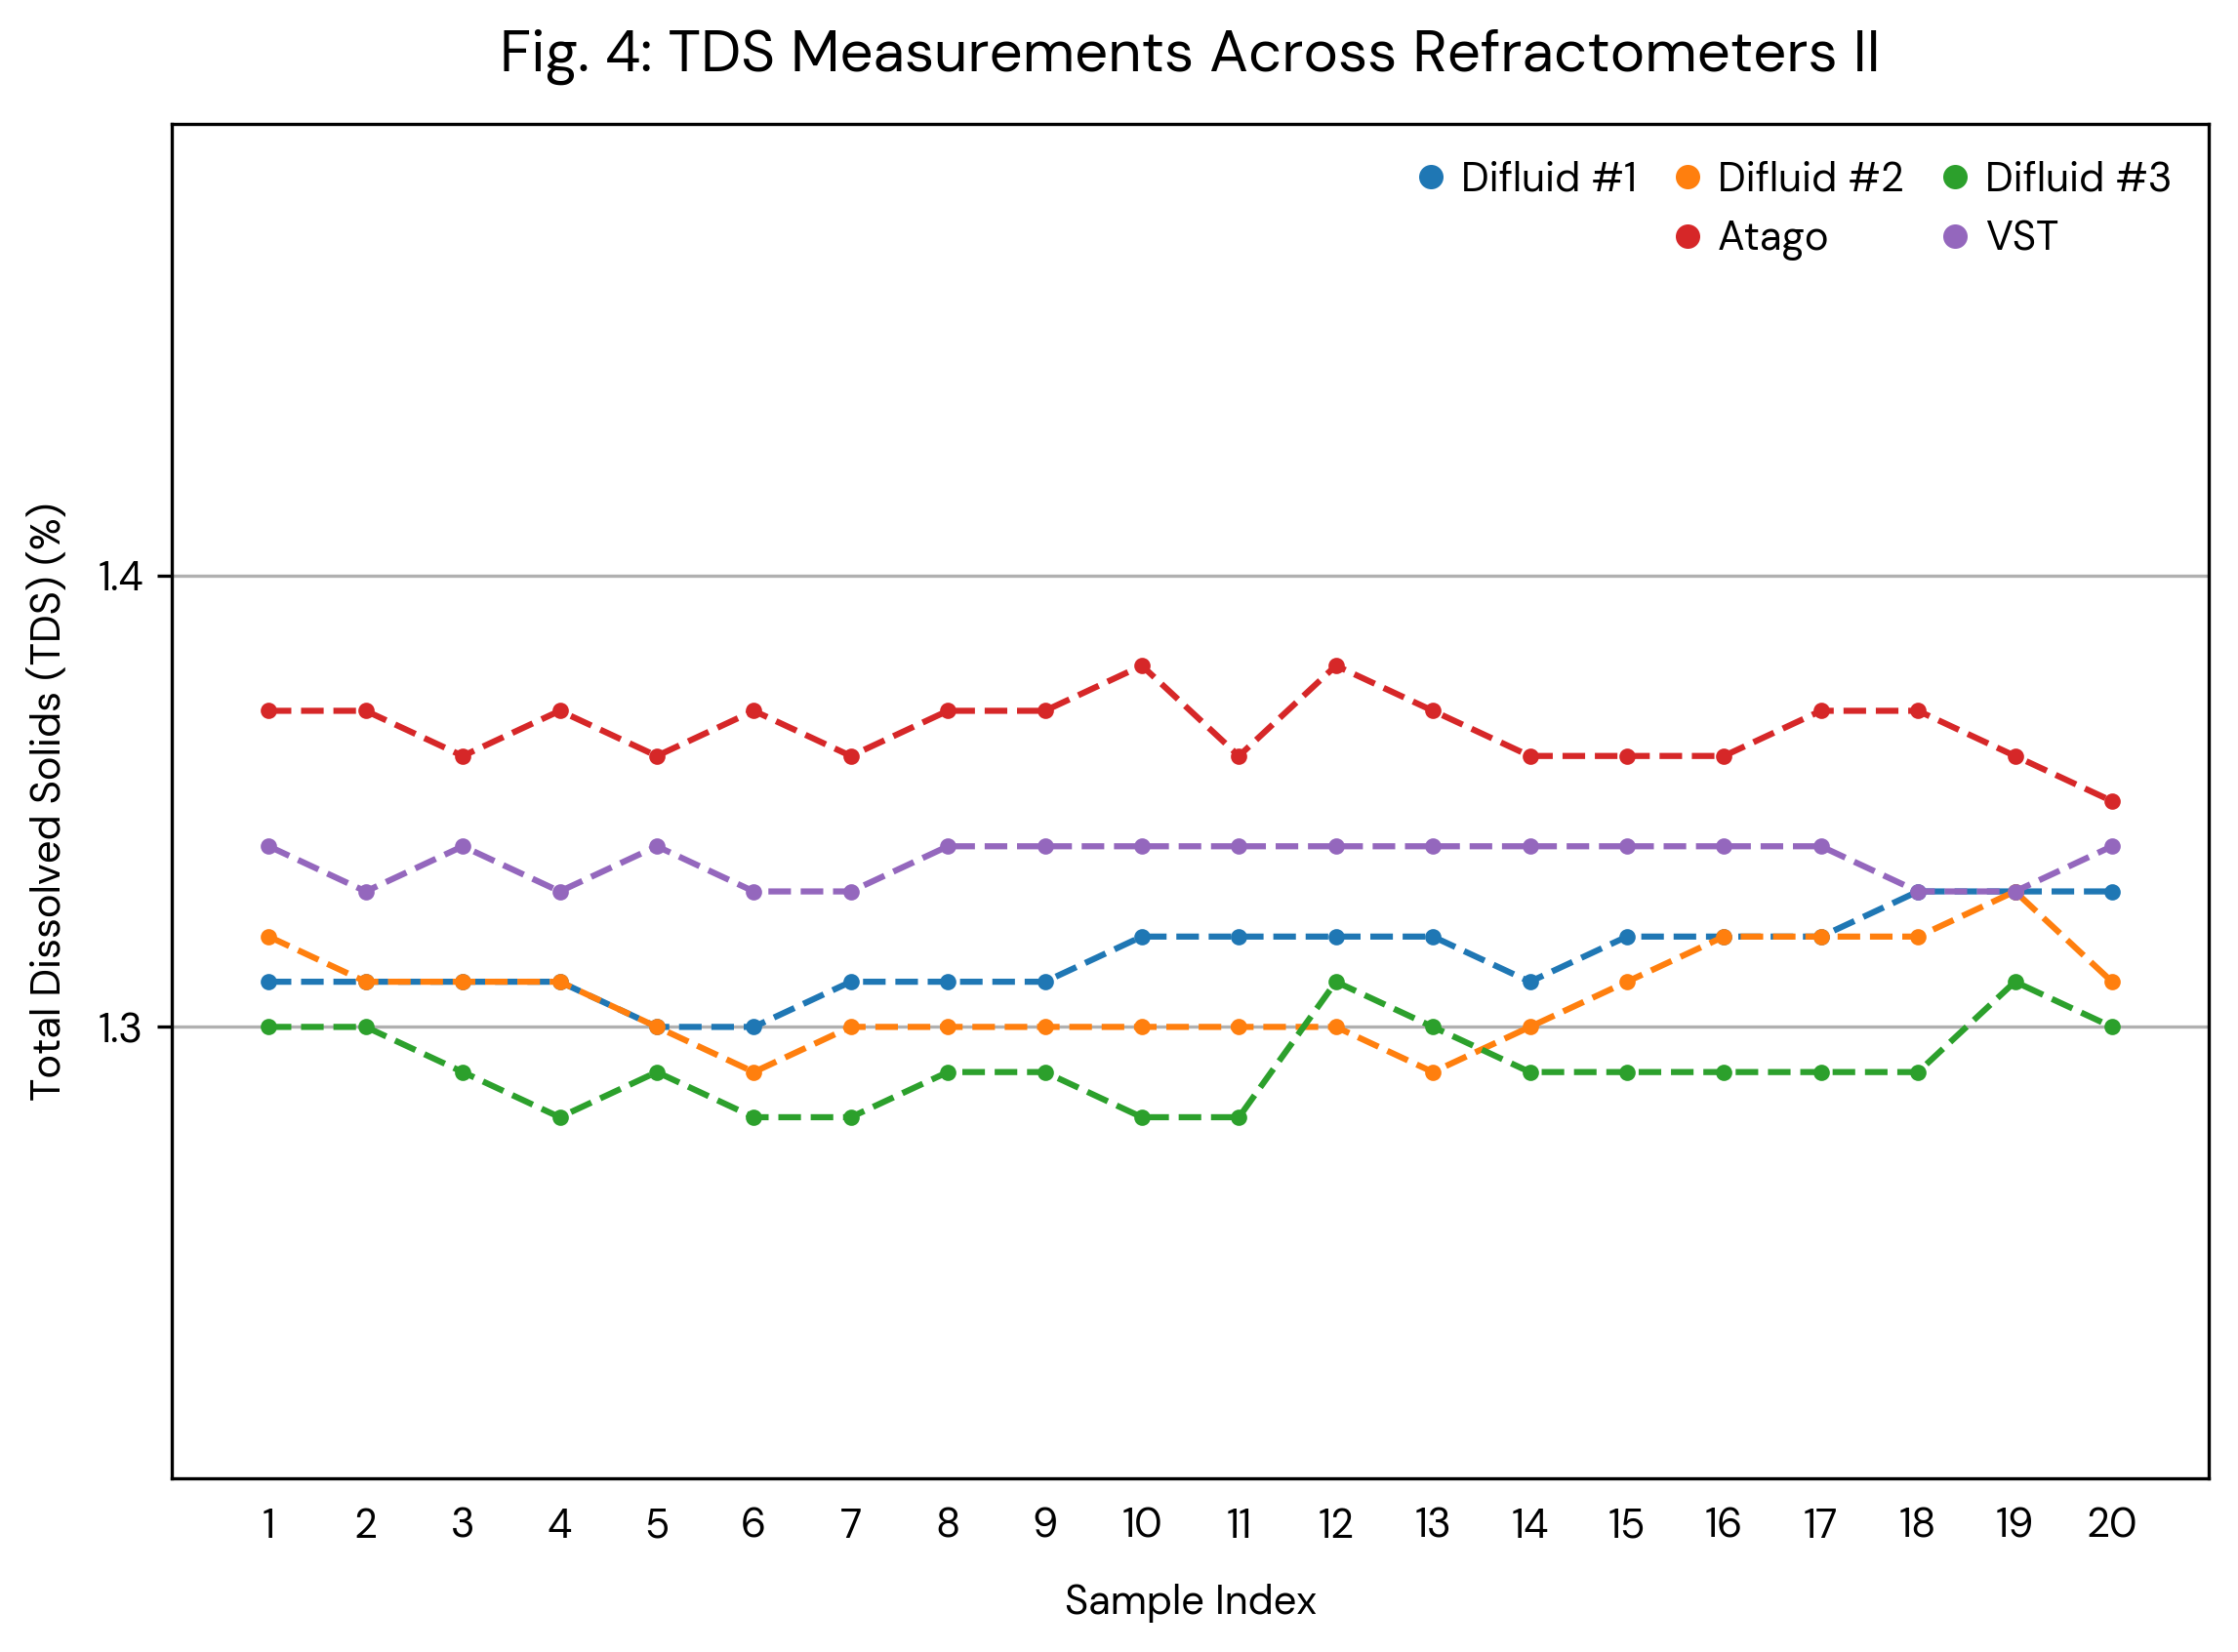

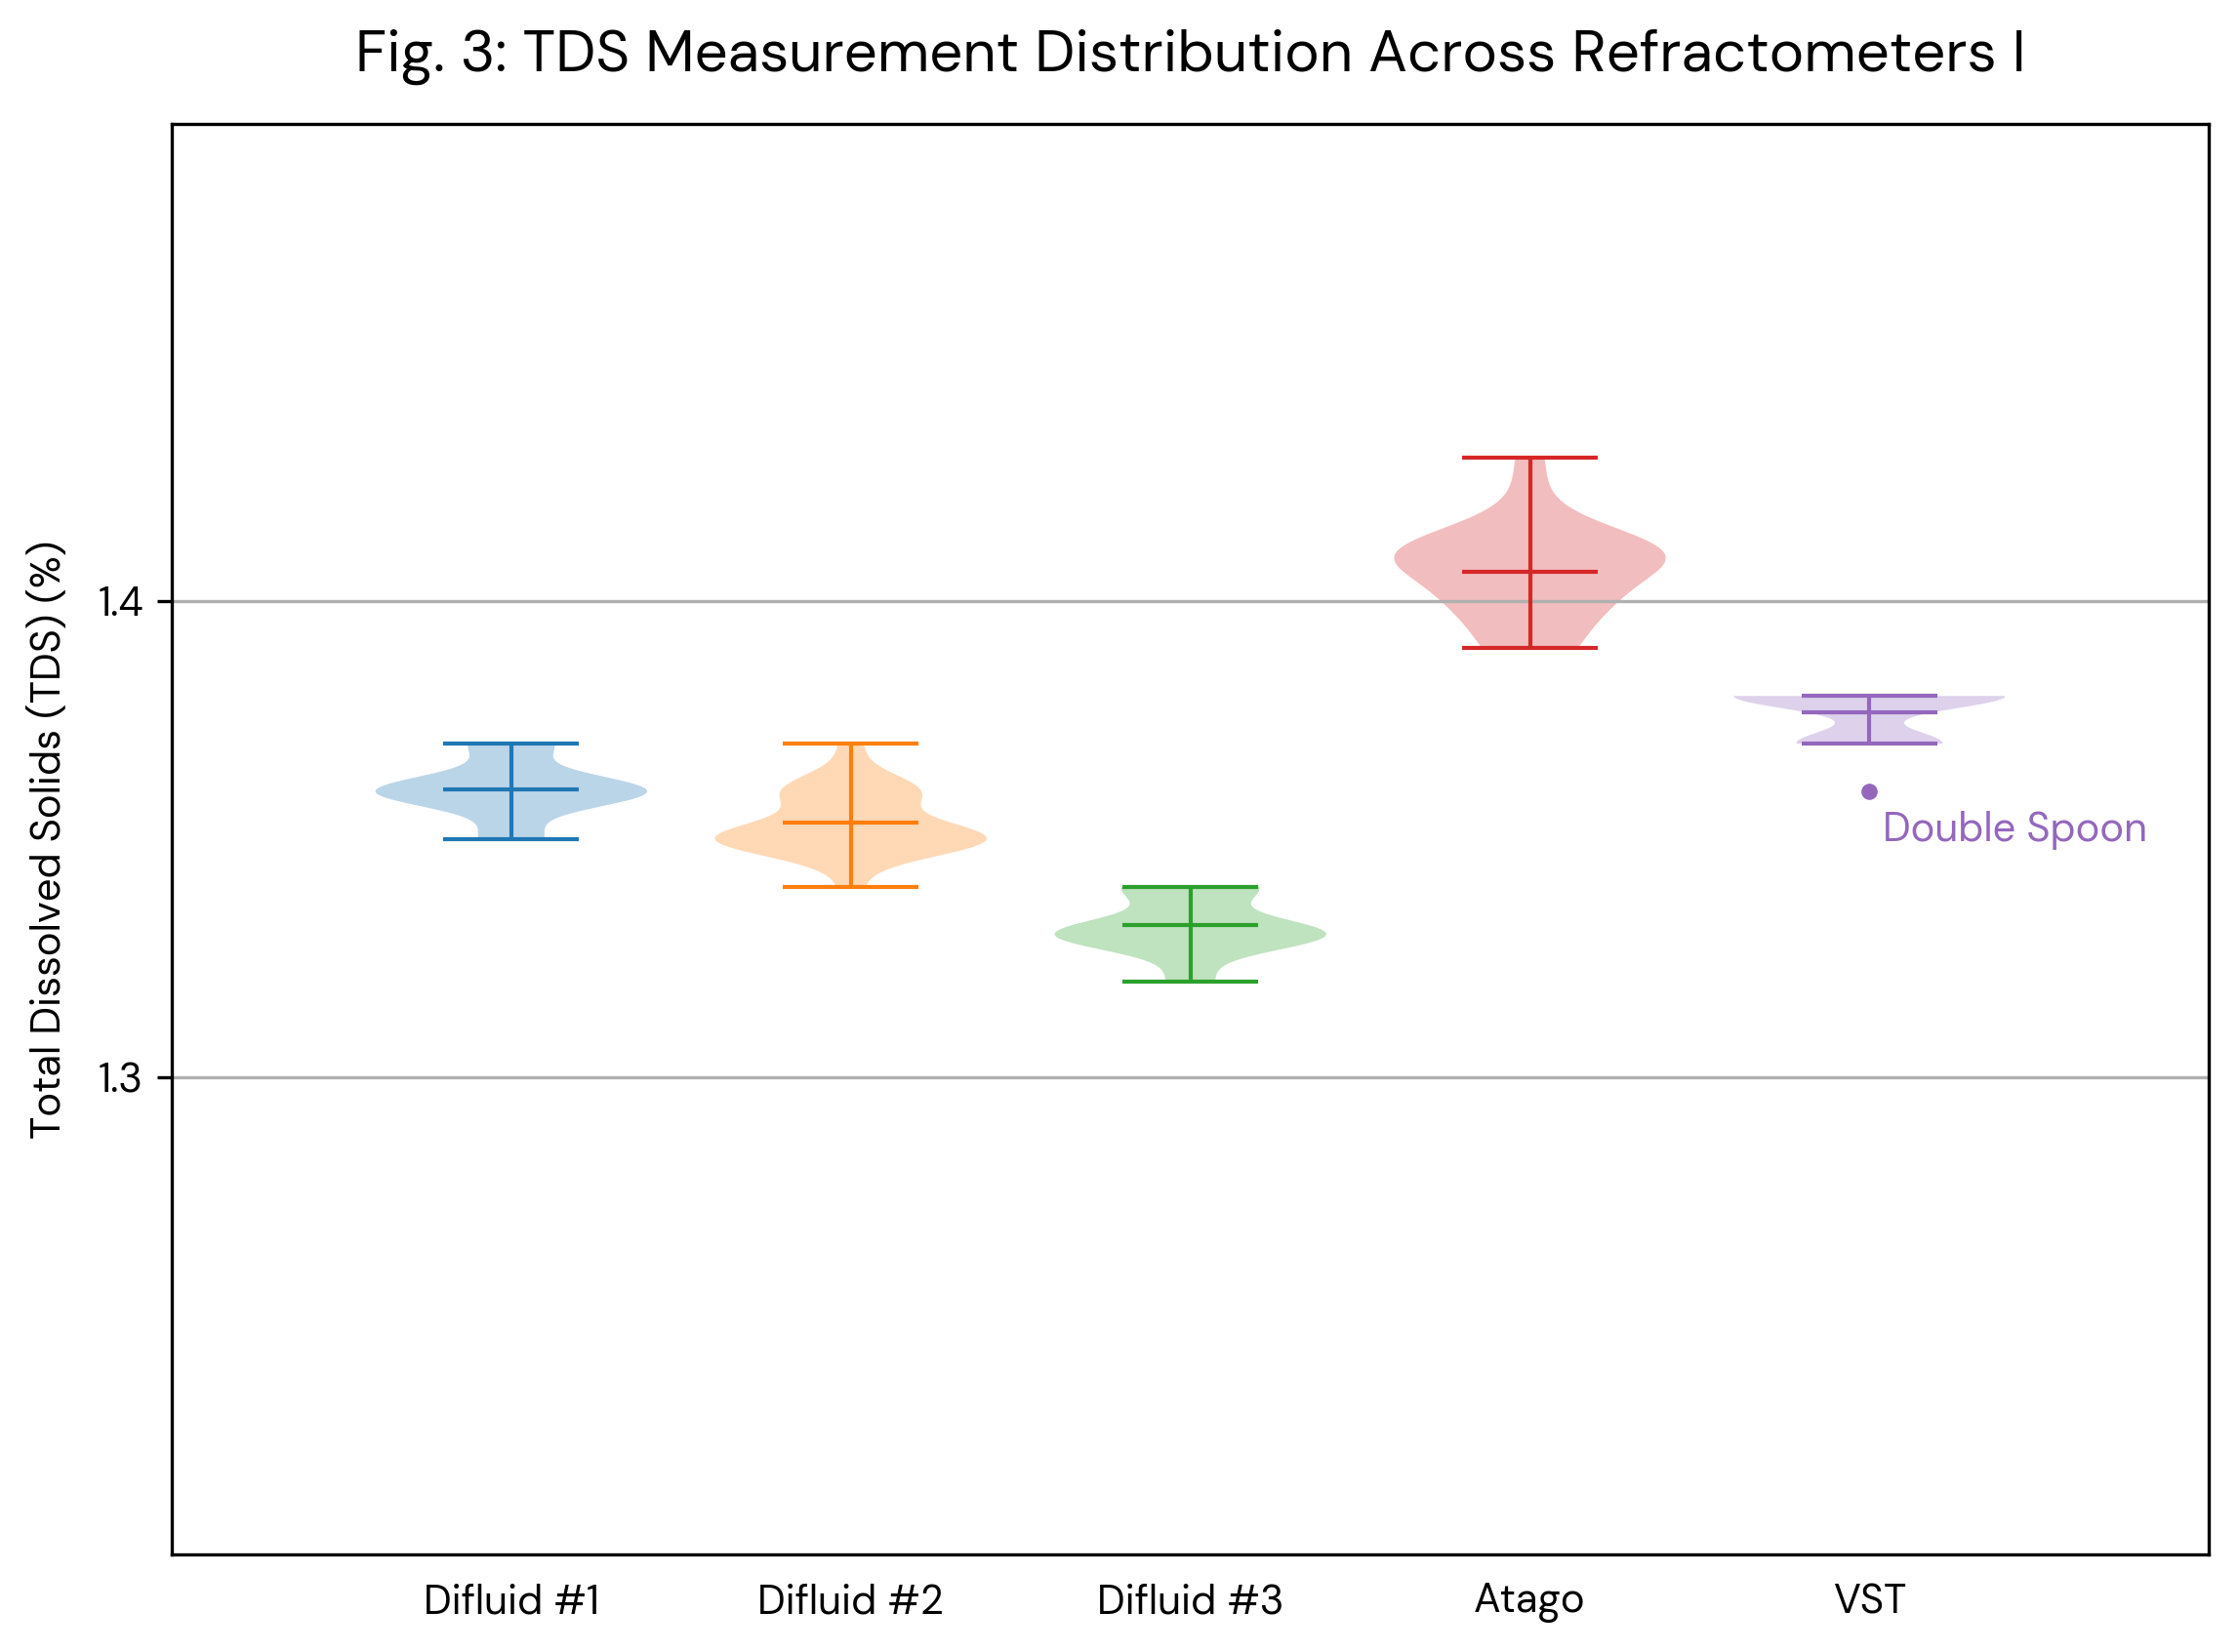

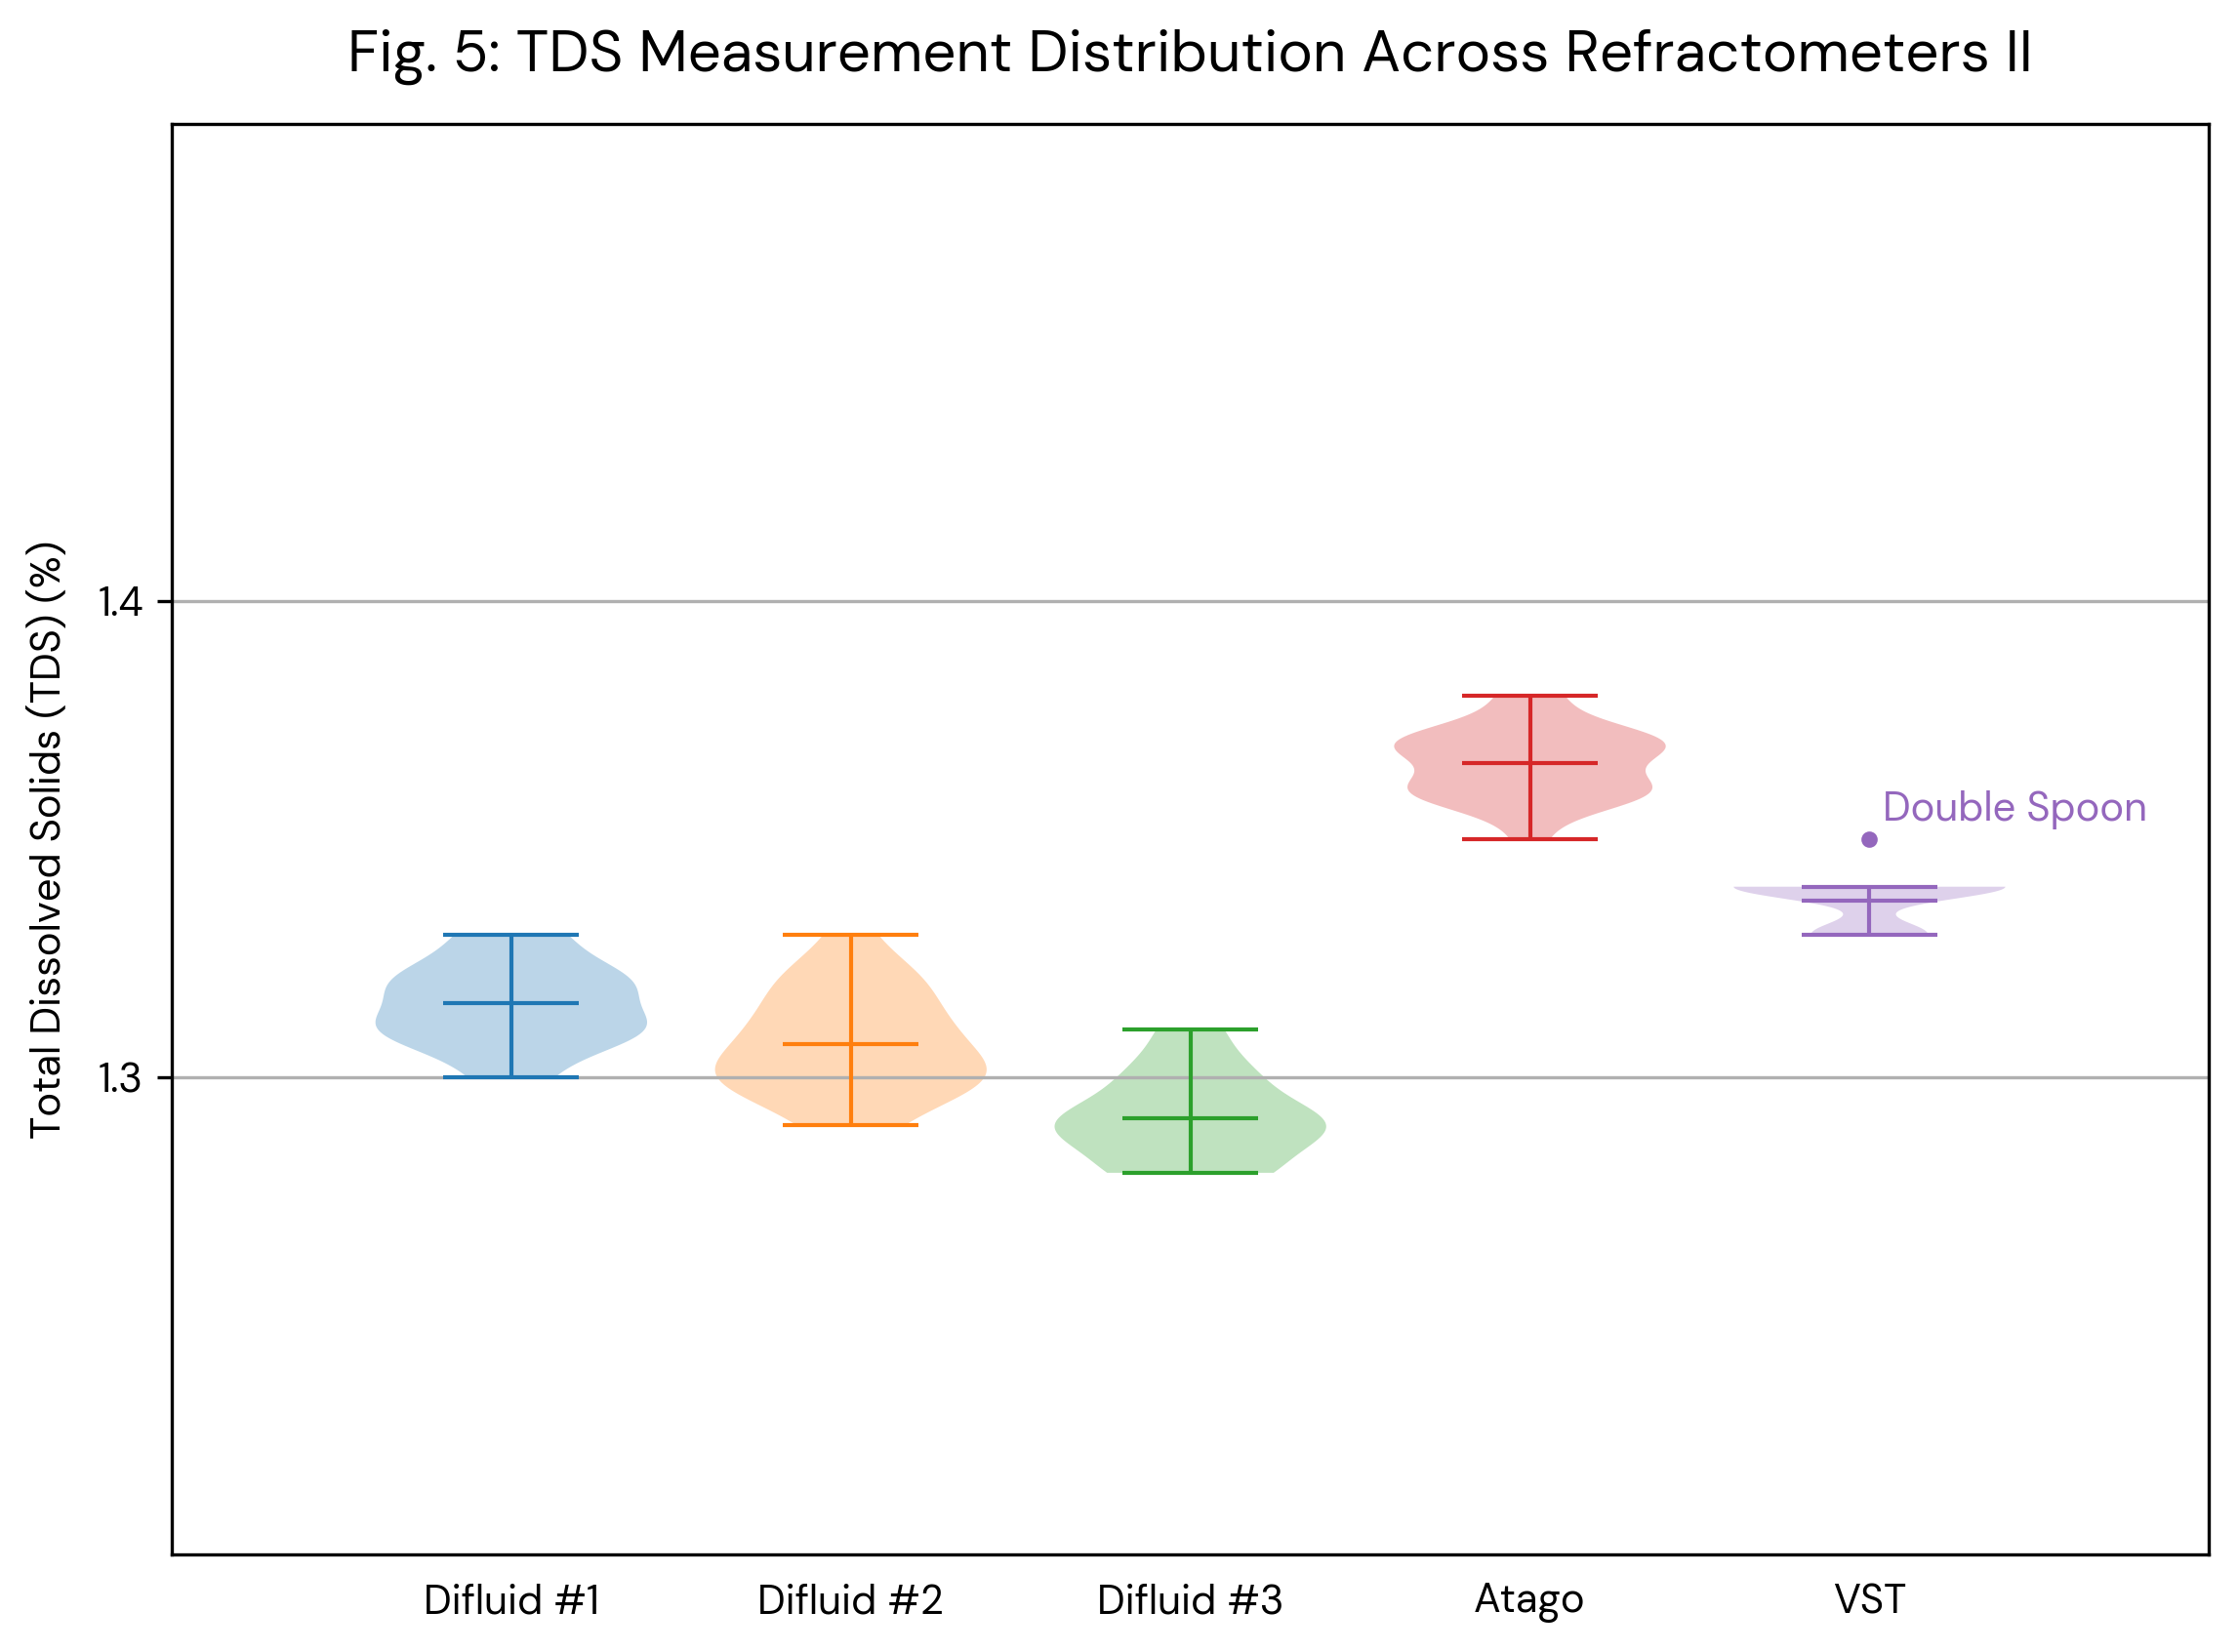

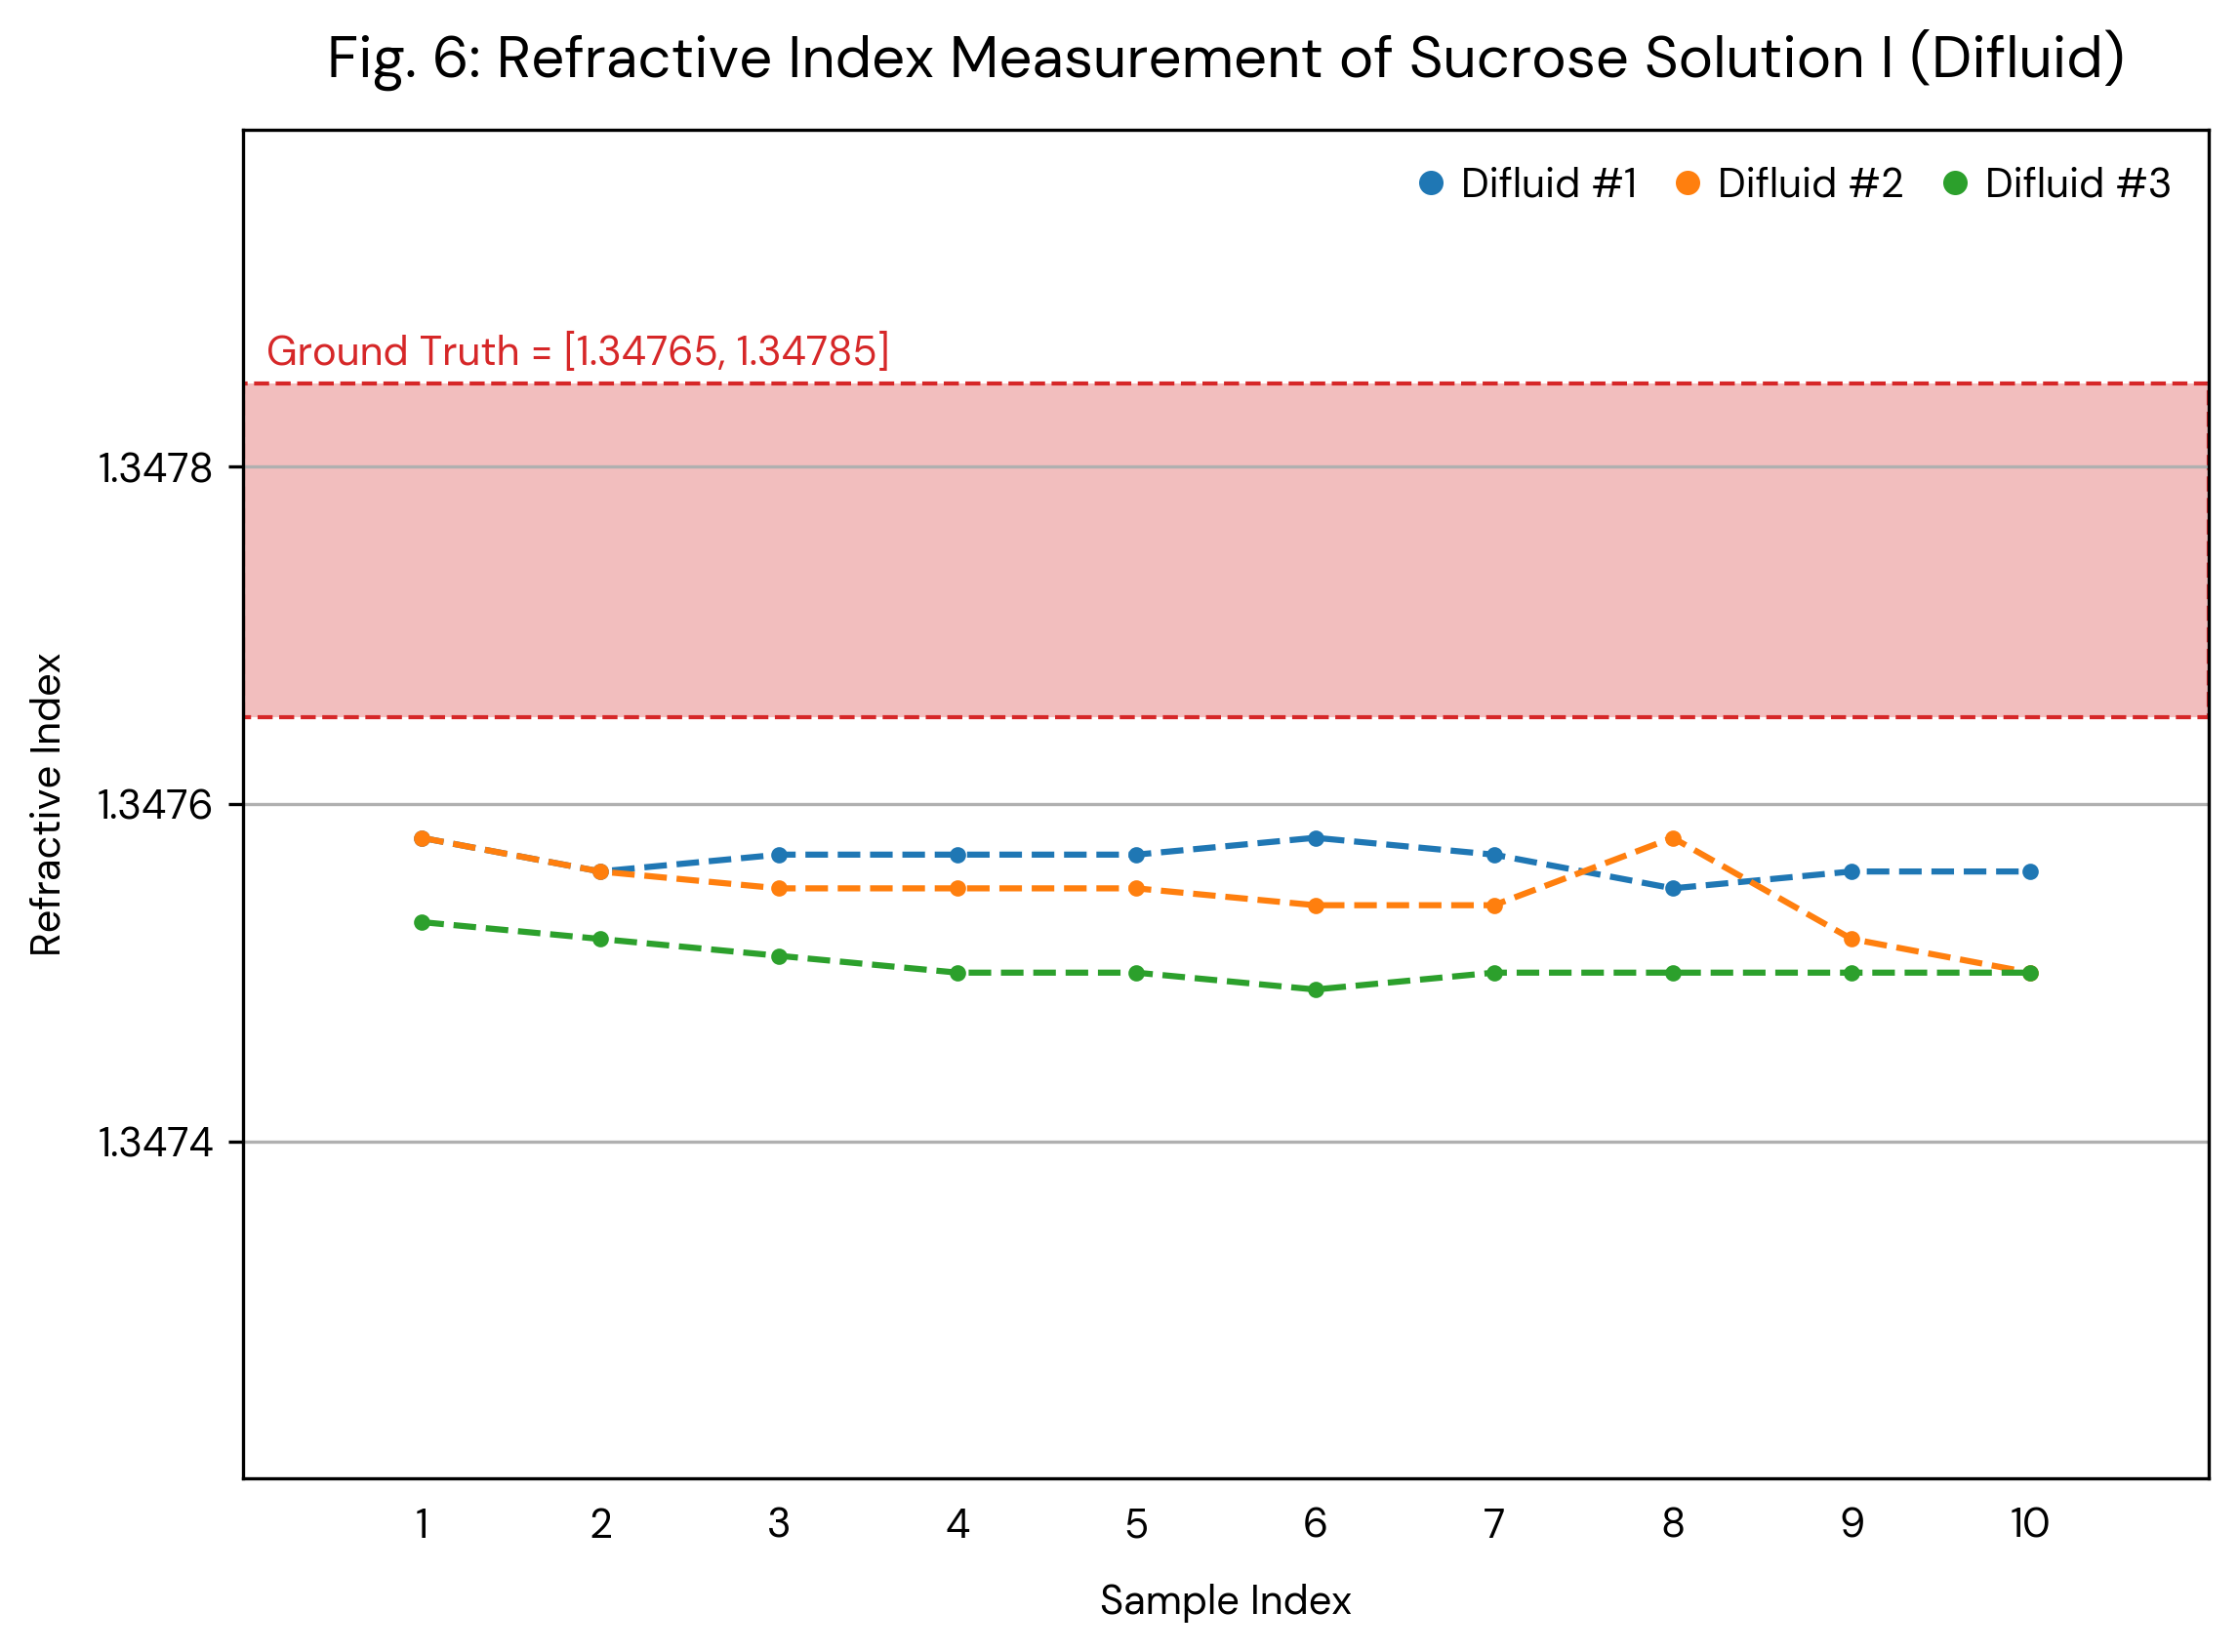

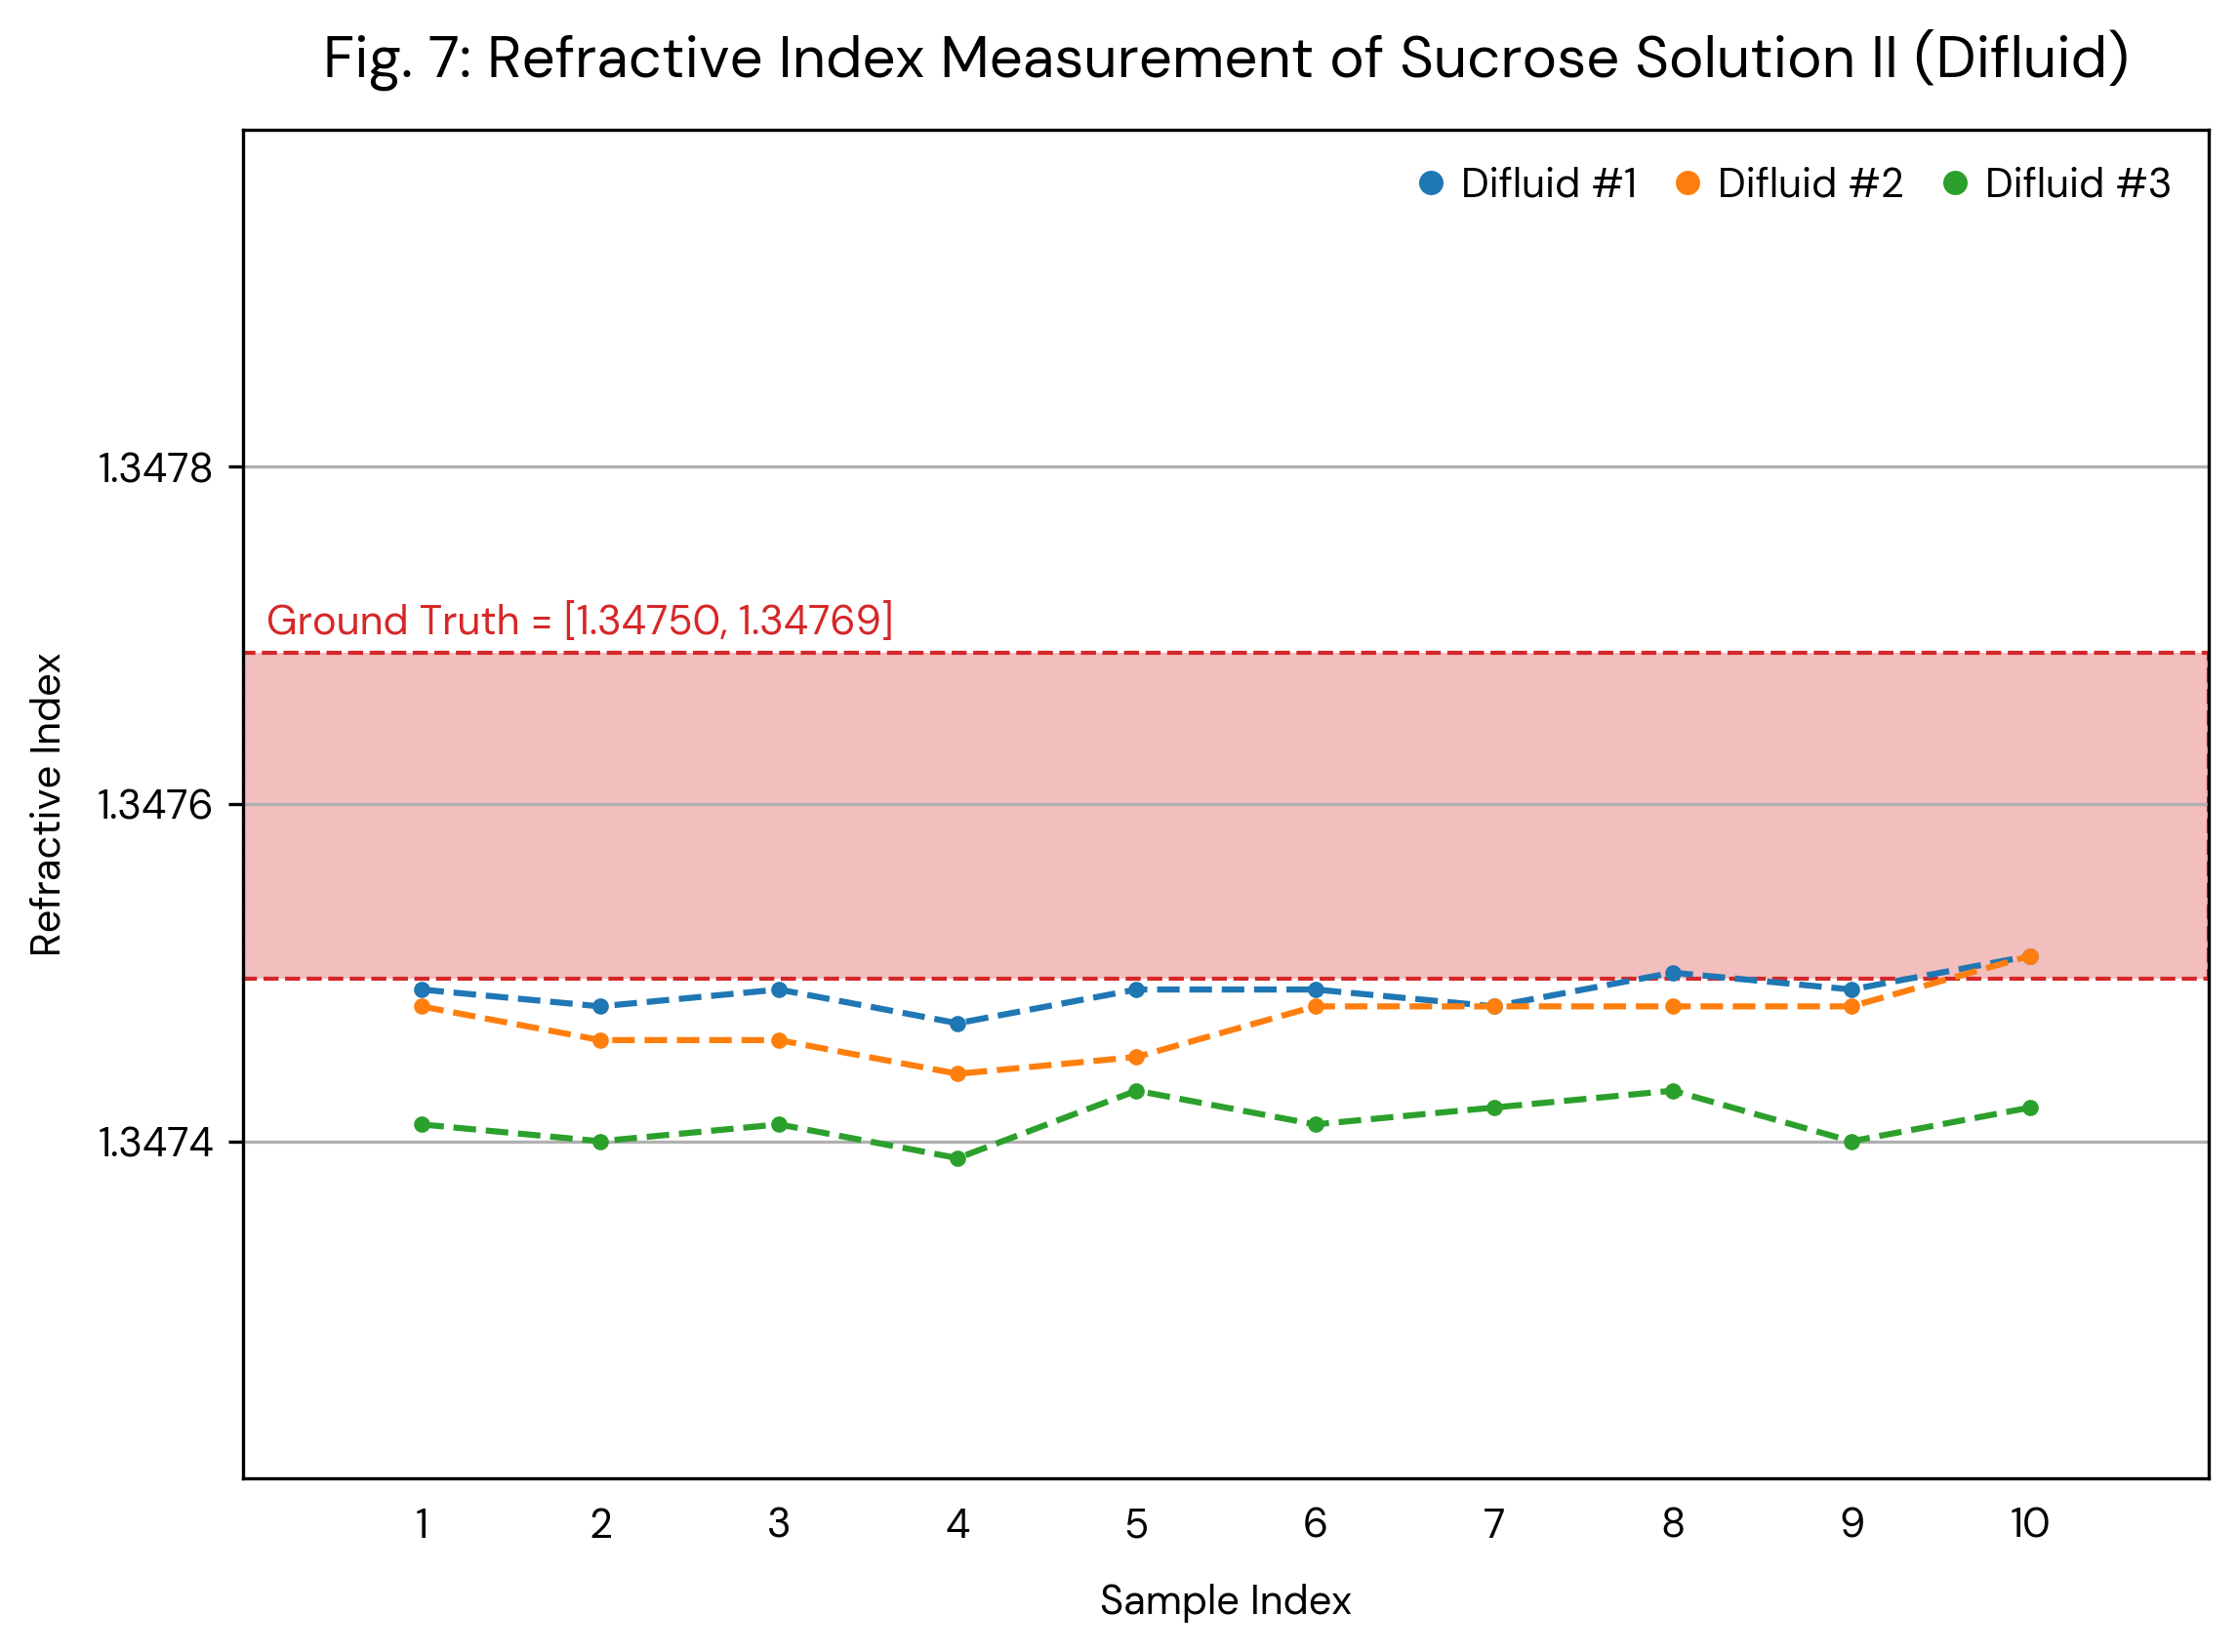

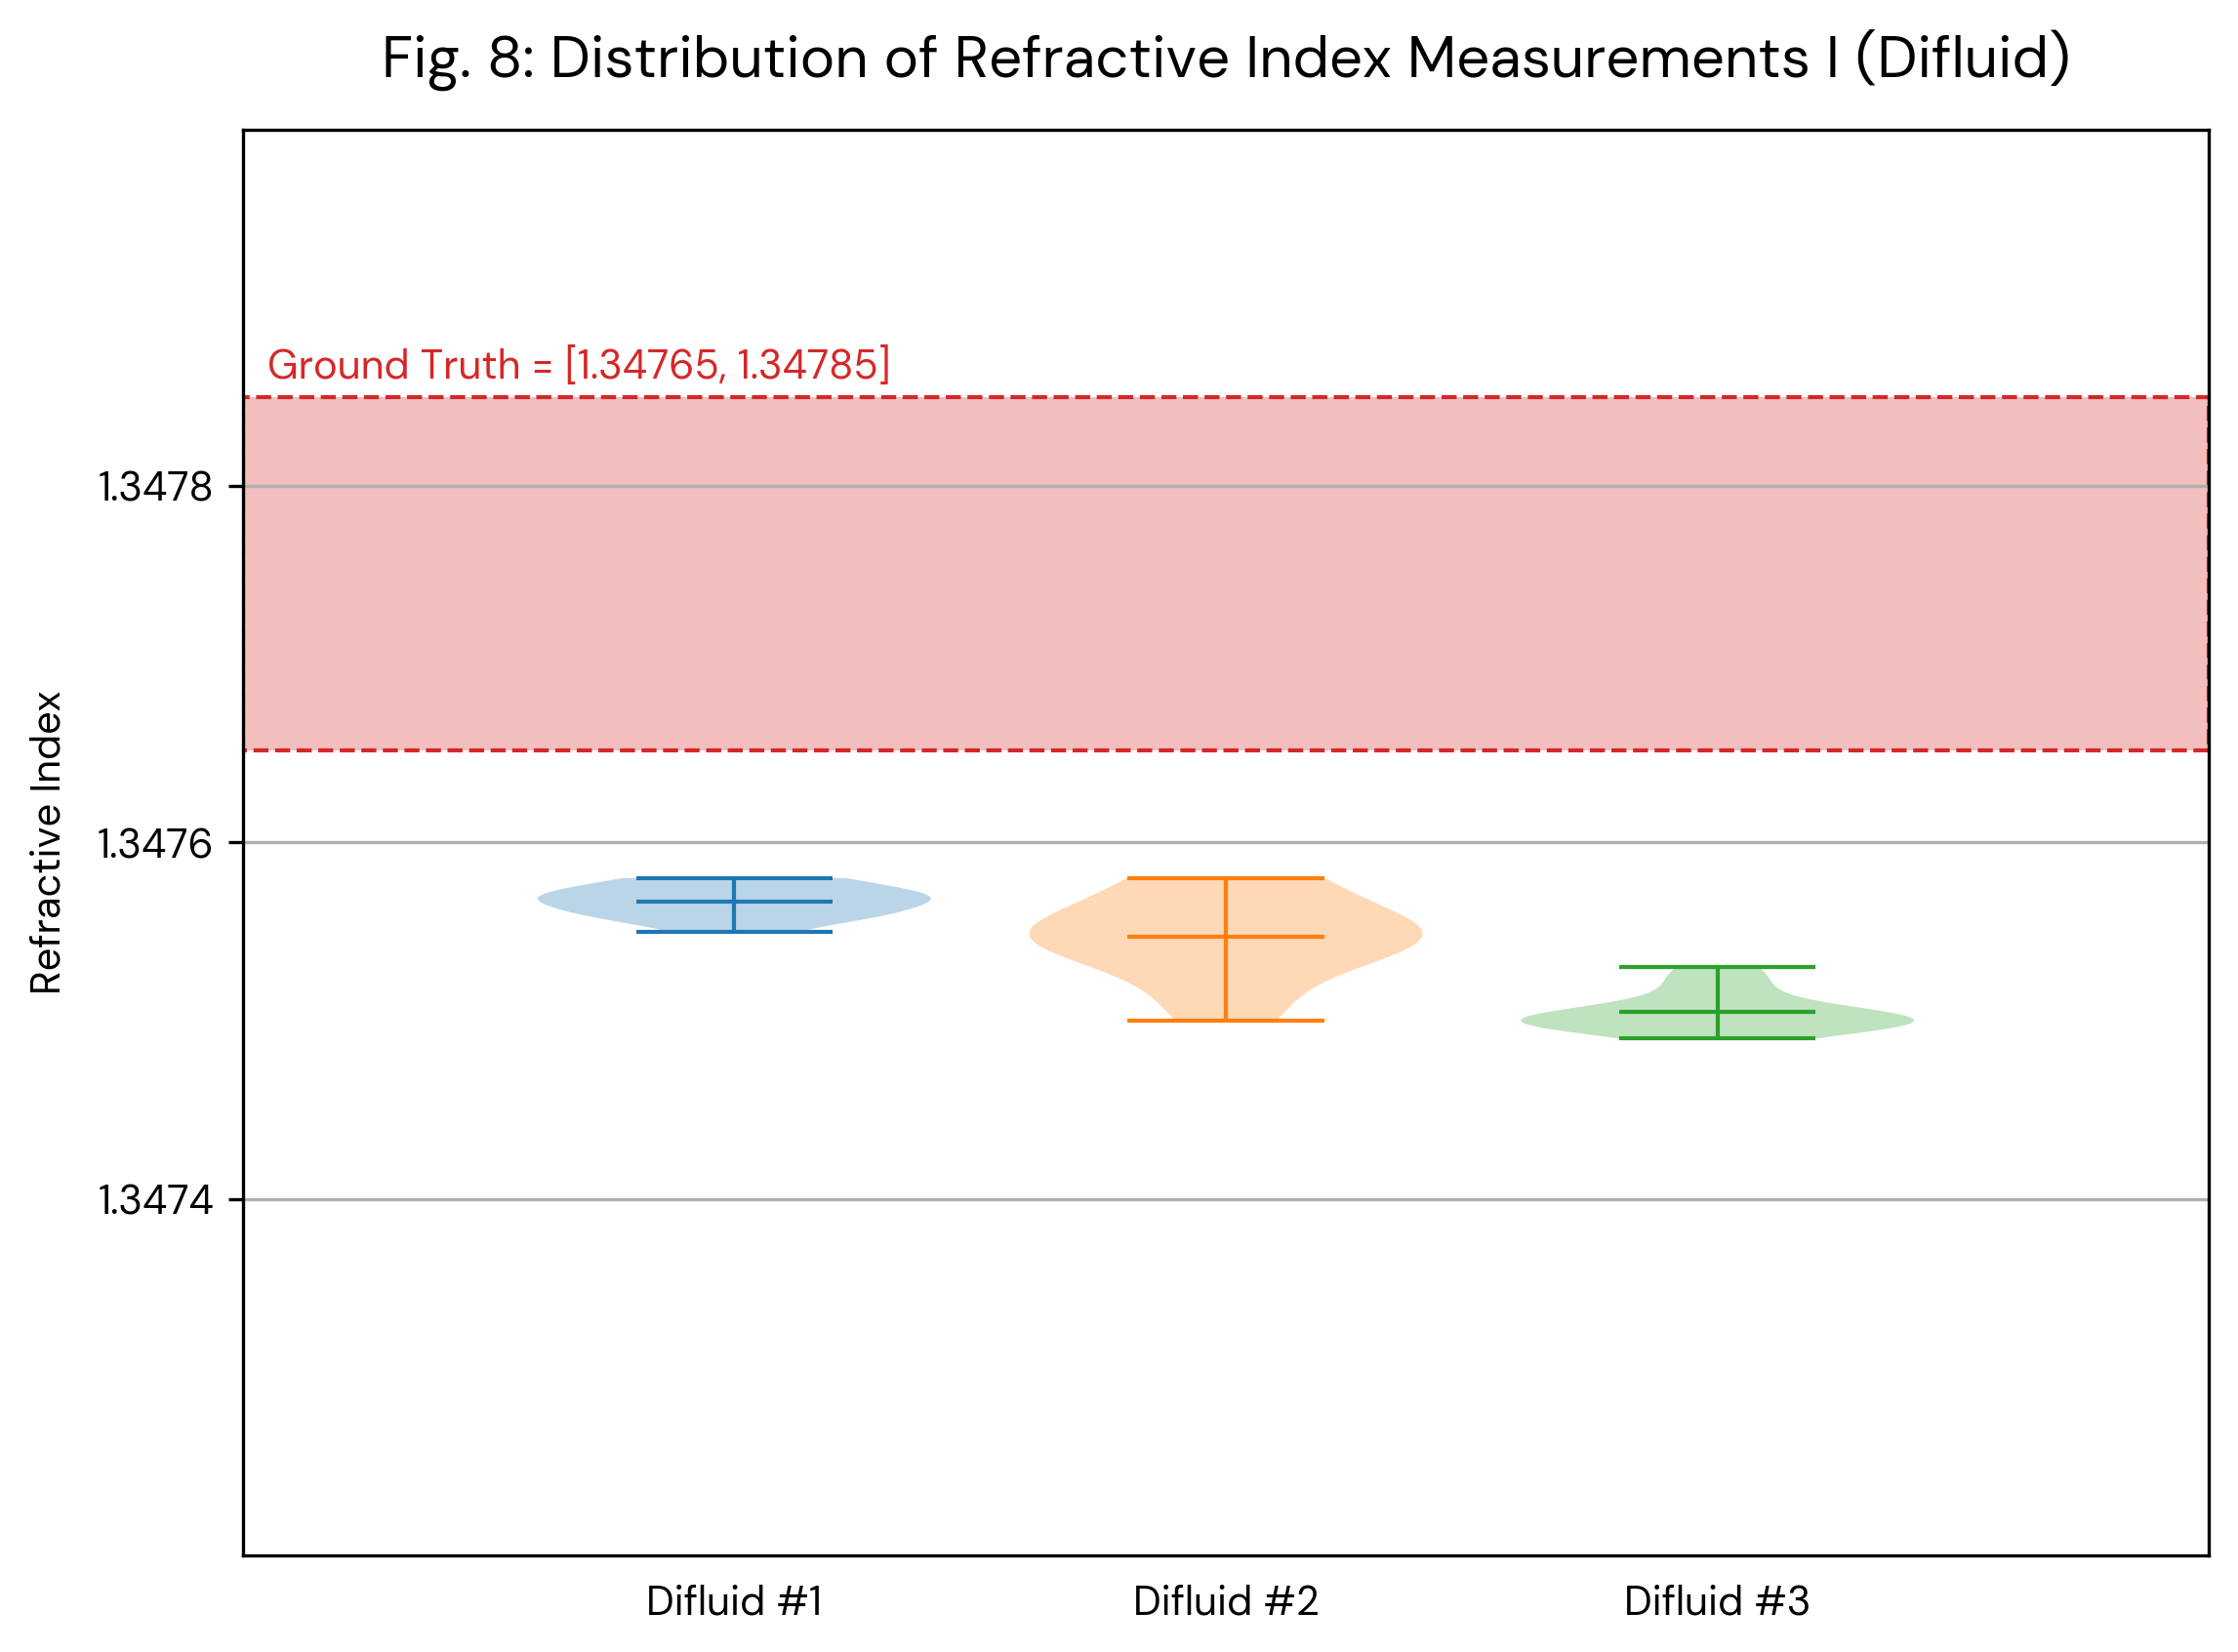

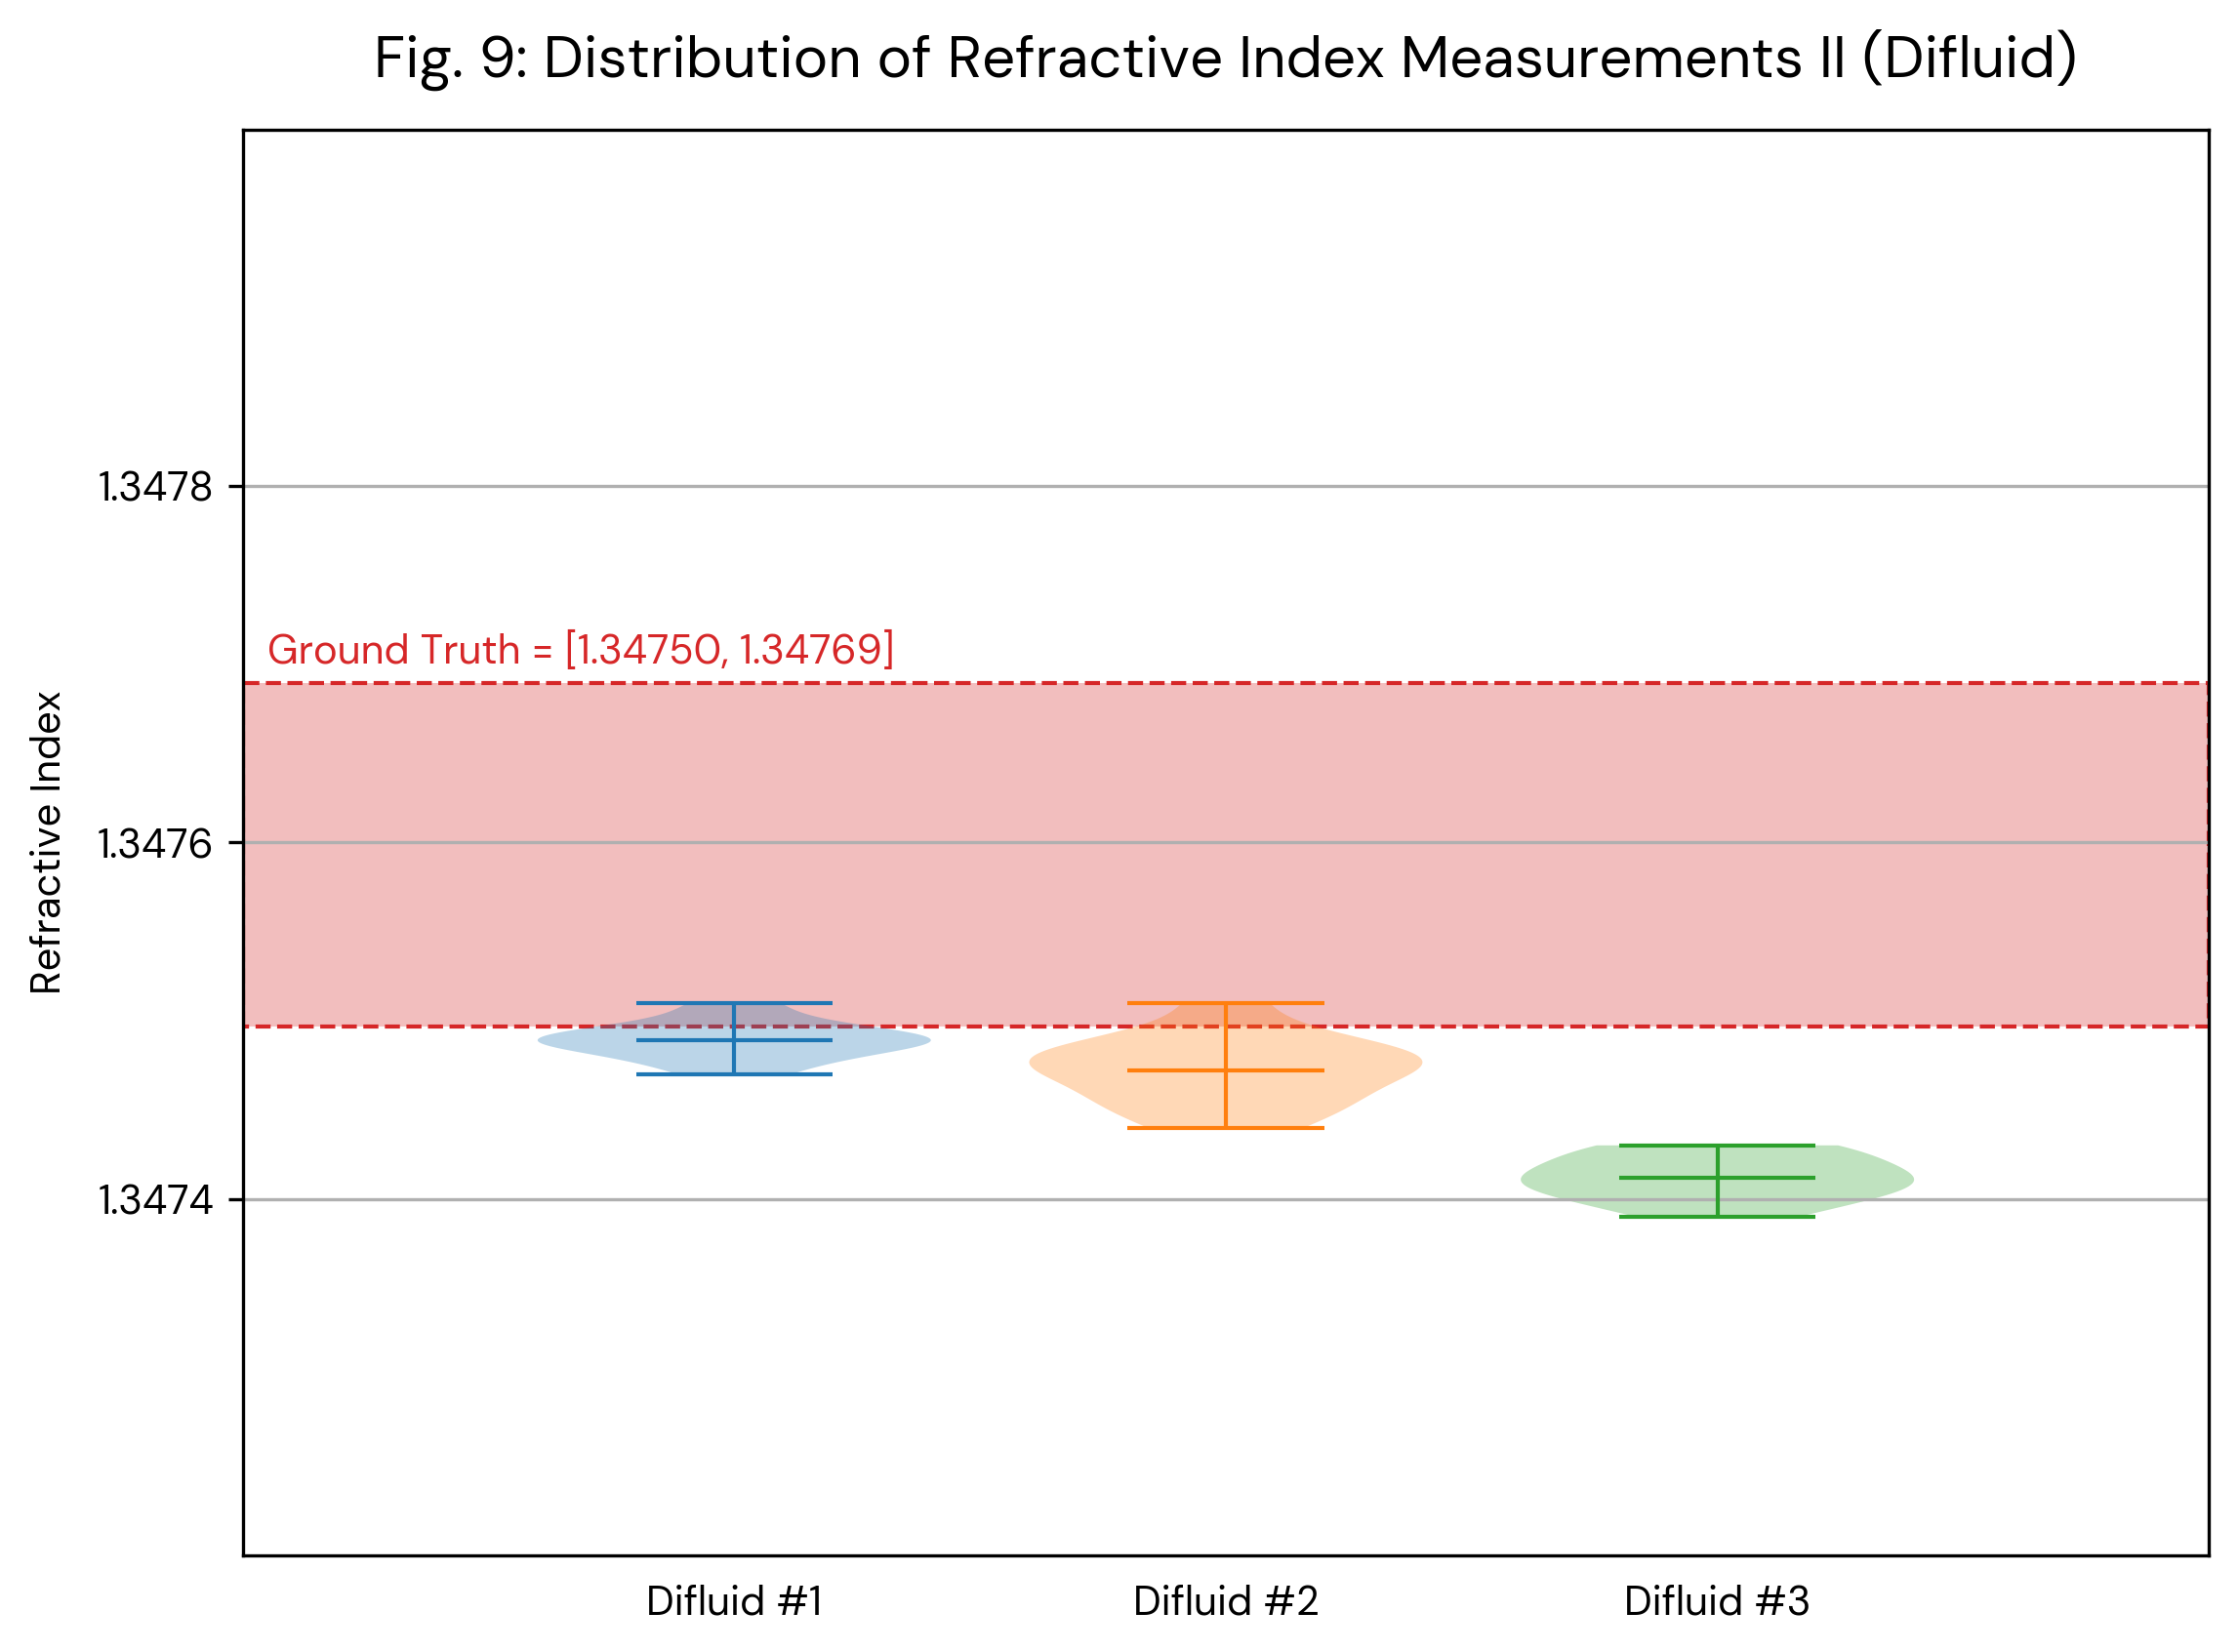

In [31]:
draw_exp1("Experiment 1", fig_num=1)

draw_exp2_line("Experiment 2.1", fig_num=2)
draw_exp2_line("Experiment 2.2", fig_num=4)
draw_exp2_violin("Experiment 2.1", fig_num=3, double_spoon=[1.36, -0.004, 'top'])
draw_exp2_violin("Experiment 2.2", fig_num=5, double_spoon=[1.35, 0.004, 'baseline'])

draw_exp3_line("Experiment 3.1", fig_num=6, ground_truth=[1.3476514435, 1.3478497044])
draw_exp3_line("Experiment 3.2", fig_num=7, ground_truth=[1.3474965864, 1.3476897059])
draw_exp3_violin("Experiment 3.1", fig_num=8, ground_truth=[1.3476514435, 1.3478497044])
draw_exp3_violin("Experiment 3.2", fig_num=9, ground_truth=[1.3474965864, 1.3476897059])

1.3450000000000002
1.305
1.3475350000000001
1.34745


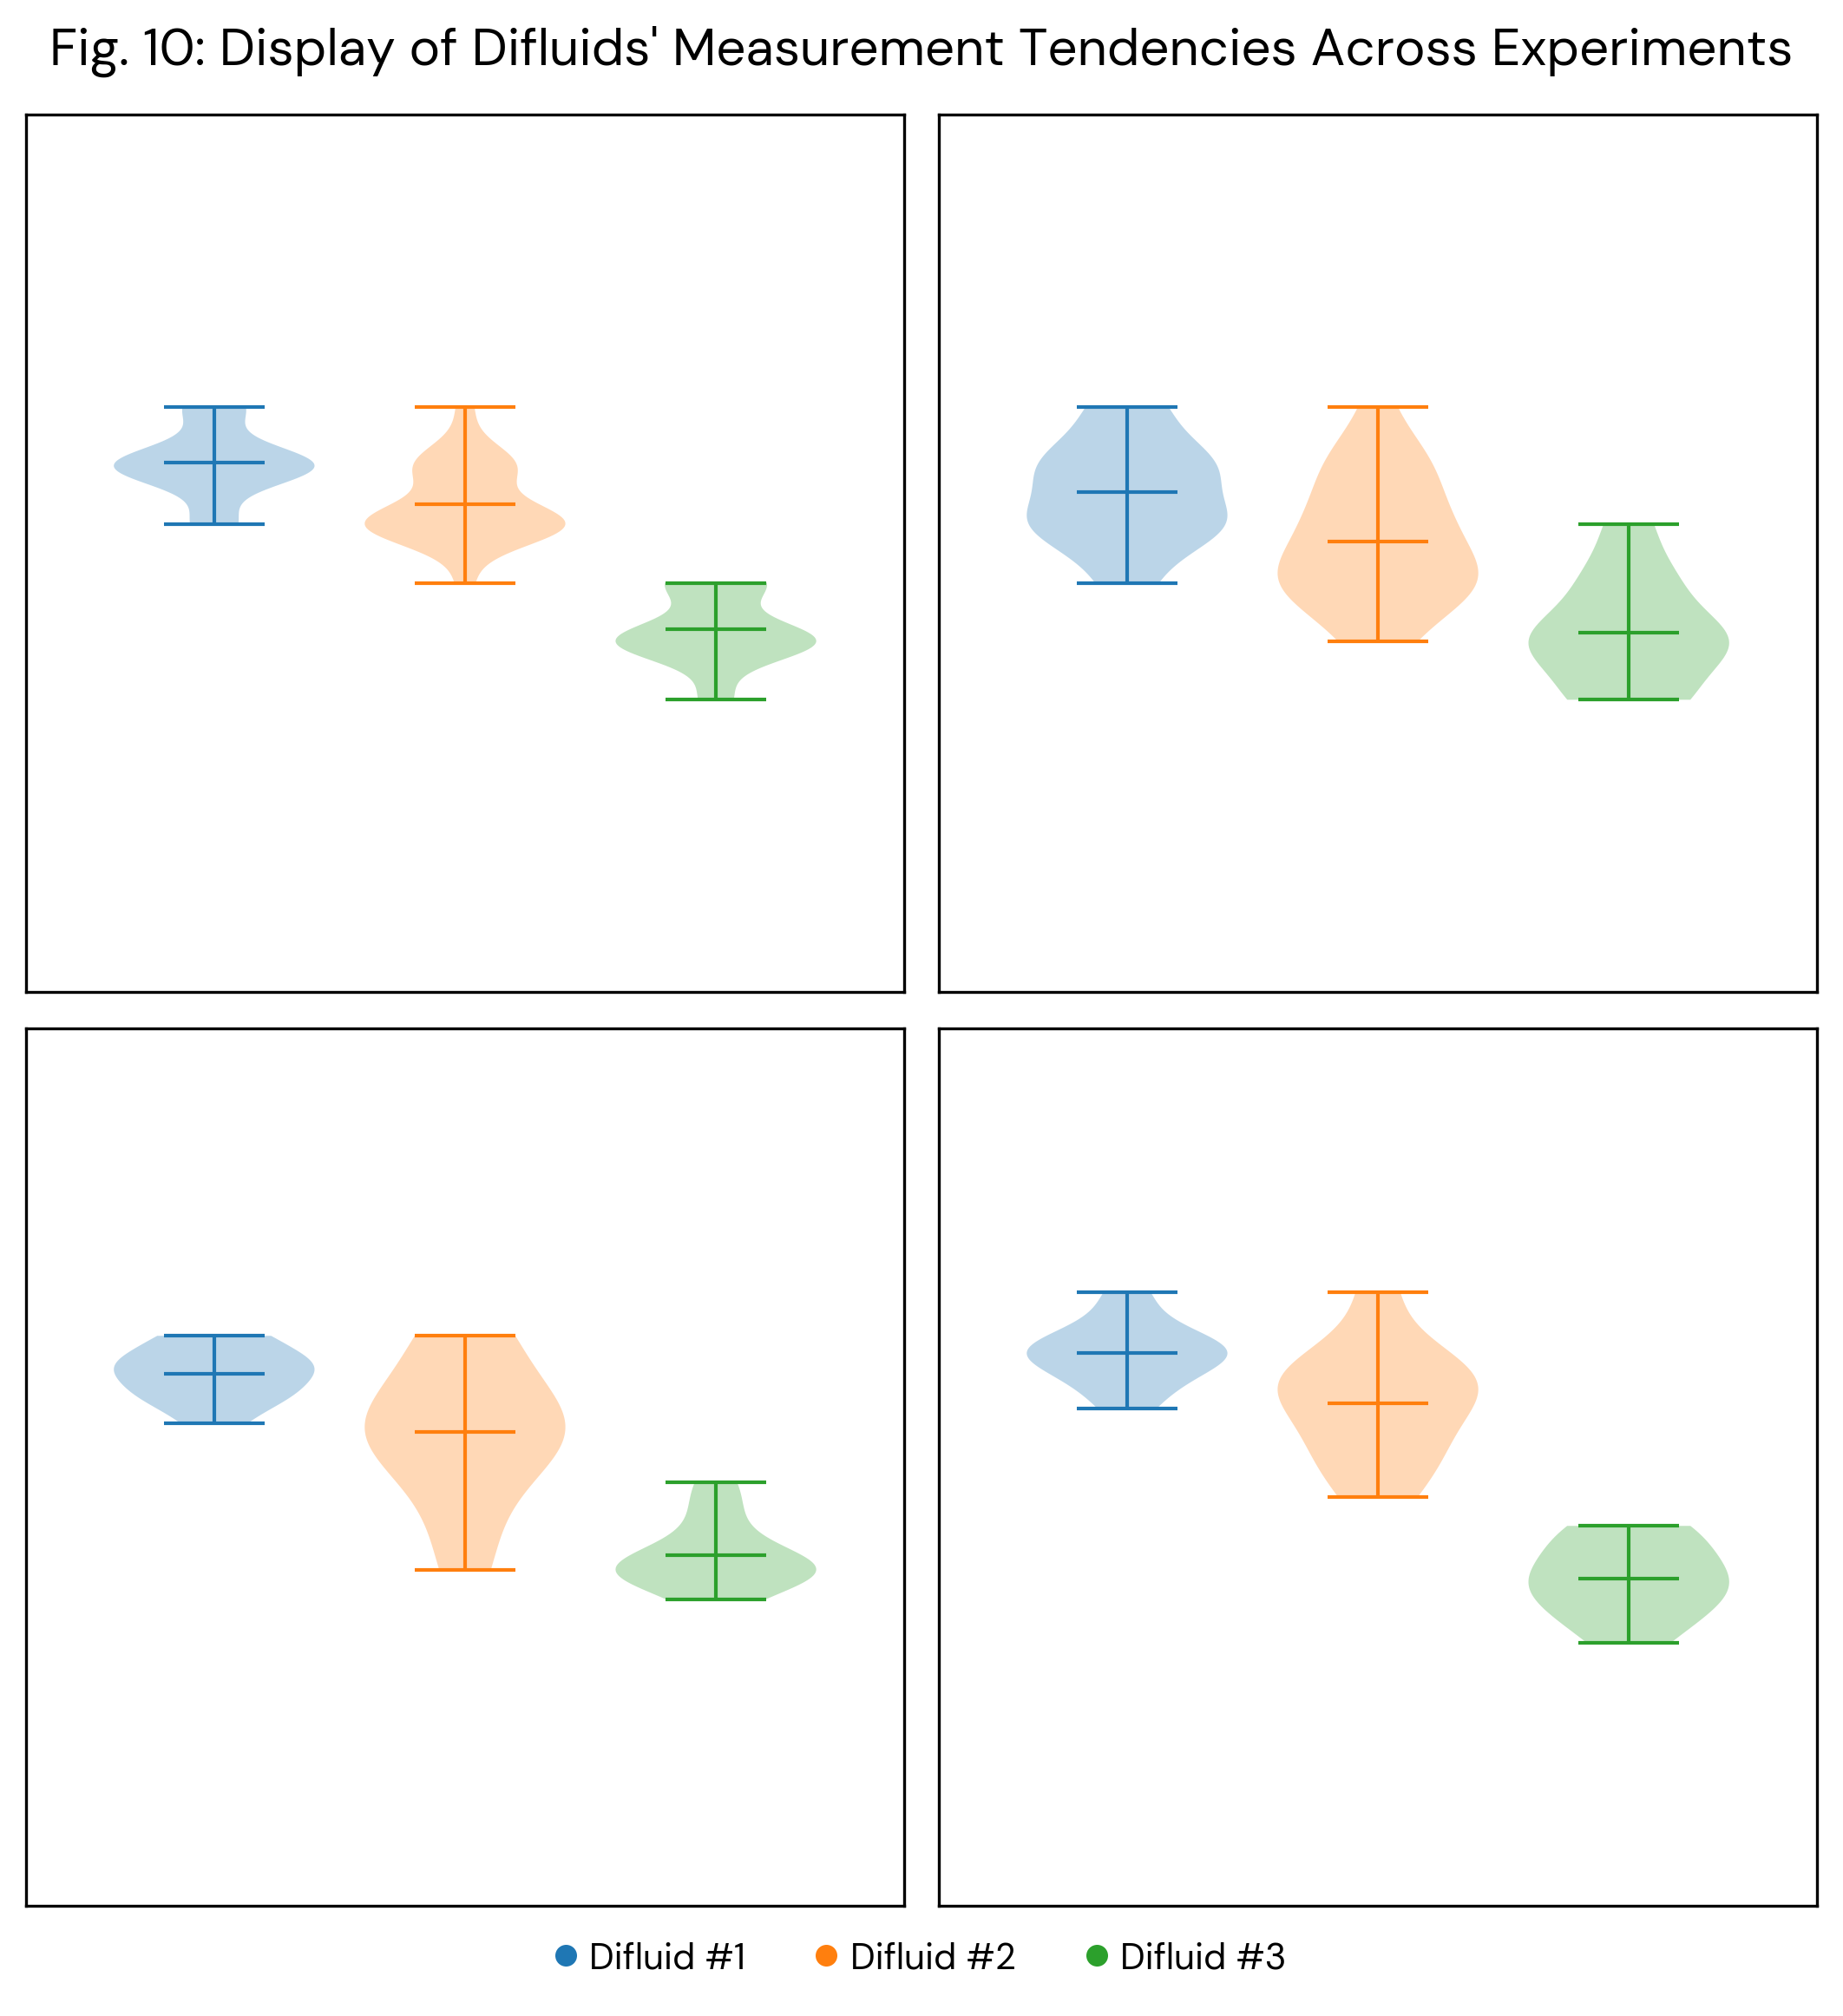

In [32]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def process_data(sheet_type, sheet_name, multiply=1):
    # Fetch data from Google Sheets based on the type of sheet
    data = read_excel_data(file_path, sheet_name)

    # For 'comparison' sheets, adjust the data as specified
    if sheet_type == 'comparison':
        del data[-1]  # Remove the last entry from the comparison data
        multiply = 100
    else:
        multiply = 1

    # Process the data and adjust measurements if it's a comparison type
    measurements, labels = preprocess_data(data, multiply=multiply)
    if sheet_type == 'comparison':
        # Remove the last two entries from the measurements
        del measurements[-2:]

    return measurements, labels


# Data processing for different sheet types
arr = []
arr.append(process_data('comparison', 'Experiment 2.1')[0])
arr.append(process_data('comparison', 'Experiment 2.2')[0])
measurements, labels = process_data('sucrose', 'Experiment 3.1')
arr.append(measurements)
arr.append(process_data('sucrose', 'Experiment 3.2')[0])

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8), dpi=300)

# Iterate over each subplot to create a violin plot
for i, ax in enumerate(axs.flatten()):
    # Create a violin plot using Matplotlib
    violin_parts = ax.violinplot(arr[i], positions=range(
        len(arr[i])), widths=0.8, showmeans=True, showextrema=True, showmedians=False)

    # Customize the violin plot colors
    for j, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(colors[j])
        pc.set_edgecolor('none')

    violin_parts['cmeans'].set_color(colors)
    violin_parts['cmins'].set_color(colors)
    violin_parts['cmaxes'].set_color(colors)
    violin_parts['cbars'].set_color(colors)

    violin_parts['cmeans'].set_linewidth(1)
    violin_parts['cmins'].set_linewidth(1)
    violin_parts['cmaxes'].set_linewidth(1)
    violin_parts['cbars'].set_linewidth(1)

    ax.set_xticks(range(len(labels)))
    if i < 2:
      ax.set_xticklabels([])
    else:
      ax.set_xticklabels([])
    ax.tick_params(bottom=False)
    ax.set_yticks([])

    # Set y-axis limits based on the data
    min_value = min(min(sublist) for sublist in arr[i])
    max_value = max(max(sublist) for sublist in arr[i])
    middle_value = (min_value + max_value) / 2
    print(middle_value)
    if i < 2:
        ax.set_ylim(middle_value - 0.075, middle_value + 0.075)
    else:
        ax.set_ylim(middle_value - 0.00015, middle_value + 0.00015)
    ax.set_xlim(-0.75, len(labels) - 0.25)
    
dots = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                          markersize=5, label=labels[i]) for i in range(len(measurements))]
fig.legend(handles=dots, loc='center', bbox_to_anchor=(0.5, 0.045),
          frameon=False, ncol=len(dots), handletextpad=0.4, handlelength=0.5)
# Adjust the layout and display the plot
fig.suptitle(fig_names[9], y=0.973, fontsize='x-large')
plt.tight_layout()
plt.subplots_adjust(left=0.07, right=0.93, top=0.93, bottom=0.07)
plt.savefig('fig10.png')
# plt.show()